**W207 Final Project**  
*Exploration Sheet*
______________________________________

# Kent Owen, Geoffrey Link, Matthew Potts, Matt Post
### W207 Final Project - House Prices


## IMPORTS AND SETUP:

In [1]:
### INITIAL IMPORTS ###

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

### ADDITIONAL USEFUL PACKAGES ###
import pandas as pd
import math

#import seaborn visualization and allow to show in python notebook
import seaborn as sns

#import prettytable
from prettytable import PrettyTable
### if not installed may need to run "pip install http://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.tar.bz2"

#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.cross_validation import train_test_split

#import statistical analysis tools
from scipy import stats
from scipy.stats import skew
from scipy.stats.stats import pearsonr

#import extra display options
from IPython.display import display, HTML

### SETTING DISPLAY OPTIONS AND RANDOM SEED ###
#set more max rows and columns to display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

### FROM OTHER SOURCES ###
#https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
# from sklearn.model_selection import cross_val_score

#https://www.kaggle.com/tadepalli/house-prices-advanced-regression-techniques/xgboost-with-n-trees-autostop-0-12638/code
from sklearn.cross_validation import StratifiedKFold, KFold
# import xgboost

#Set random seed
np.random.seed(0)

# Remove Deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#READ IN TRAIN, TEST DATA

#Windows Format: C:/Users/kowen/Dropbox/W207 FINAL PROJECT/
train_data = pd.read_csv('C:/Users/kowen/Dropbox/W207 FINAL PROJECT/train.csv')
test_data = pd.read_csv('C:/Users/kowen/Dropbox/W207 FINAL PROJECT/test.csv')

#Mac Format: /Users/matthewpotts/Dropbox/W207 FINAL PROJECT
# train_data = pd.read_csv('C:/Users/mpotts/Dropbox/W207 FINAL PROJECT/train.csv')
# test_data = pd.read_csv('C:/Users/mpotts/Dropbox/W207 FINAL PROJECT/test.csv')

#bring in data and document descriptions (useful for learning about data and source notes)
#data_description = open('/Users/matthewpotts/Dropbox/W207 FINAL PROJECT/data_description.txt', 'r').read()
#data_documentation = open('/Users/matthewpotts/Dropbox/W207 FINAL PROJECT/DataDocumentation.txt', 'r').read()  #from https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt



## DATA EXPLORATION / VISUALIZATION:

In [3]:
#display train and test data in pandas dataframe
print "TRAIN DATA:"
print "Number of rows: " + str(len(train_data))
display(train_data.head(5))

print "TEST DATA:"
print "Number of rows: " + str(len(test_data))
display(test_data.head(5))

TRAIN DATA:
Number of rows: 1460


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

TEST DATA:
Number of rows: 1459


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [4]:
#MSSubClass is set as type = int64 but is actually a categorical variable of housing type
### reset to data type == 'object'
train_data['MSSubClass'] = train_data['MSSubClass'].astype('object')
test_data['MSSubClass'] = test_data['MSSubClass'].astype('object')

### reset YrSold to object to allow for binarization (as housing prices don't fluctuate linearly)
train_data['YrSold'] = train_data['YrSold'].astype('object')
test_data['YrSold'] = test_data['YrSold'].astype('object')

In [5]:
#explore column types and null data

column_types = PrettyTable(['Index', 'Column Name', 'Column Type', 'Number of Nulls'])

#add relevant portions to table
a_count = 0
for a in train_data.columns:
    column_types.add_row([a_count, a, train_data[a].dtypes, pd.isnull(train_data).sum()[a_count]])
    a_count += 1
    
print ('Data Types in the Train Dataset:')
print(train_data.dtypes.value_counts())
print (' ')
print column_types

Data Types in the Train Dataset:
object     45
int64      33
float64     3
dtype: int64
 
+-------+---------------+-------------+-----------------+
| Index |  Column Name  | Column Type | Number of Nulls |
+-------+---------------+-------------+-----------------+
|   0   |       Id      |    int64    |        0        |
|   1   |   MSSubClass  |    object   |        0        |
|   2   |    MSZoning   |    object   |        0        |
|   3   |  LotFrontage  |   float64   |       259       |
|   4   |    LotArea    |    int64    |        0        |
|   5   |     Street    |    object   |        0        |
|   6   |     Alley     |    object   |       1369      |
|   7   |    LotShape   |    object   |        0        |
|   8   |  LandContour  |    object   |        0        |
|   9   |   Utilities   |    object   |        0        |
|   10  |   LotConfig   |    object   |        0        |
|   11  |   LandSlope   |    object   |        0        |
|   12  |  Neighborhood |    object   | 

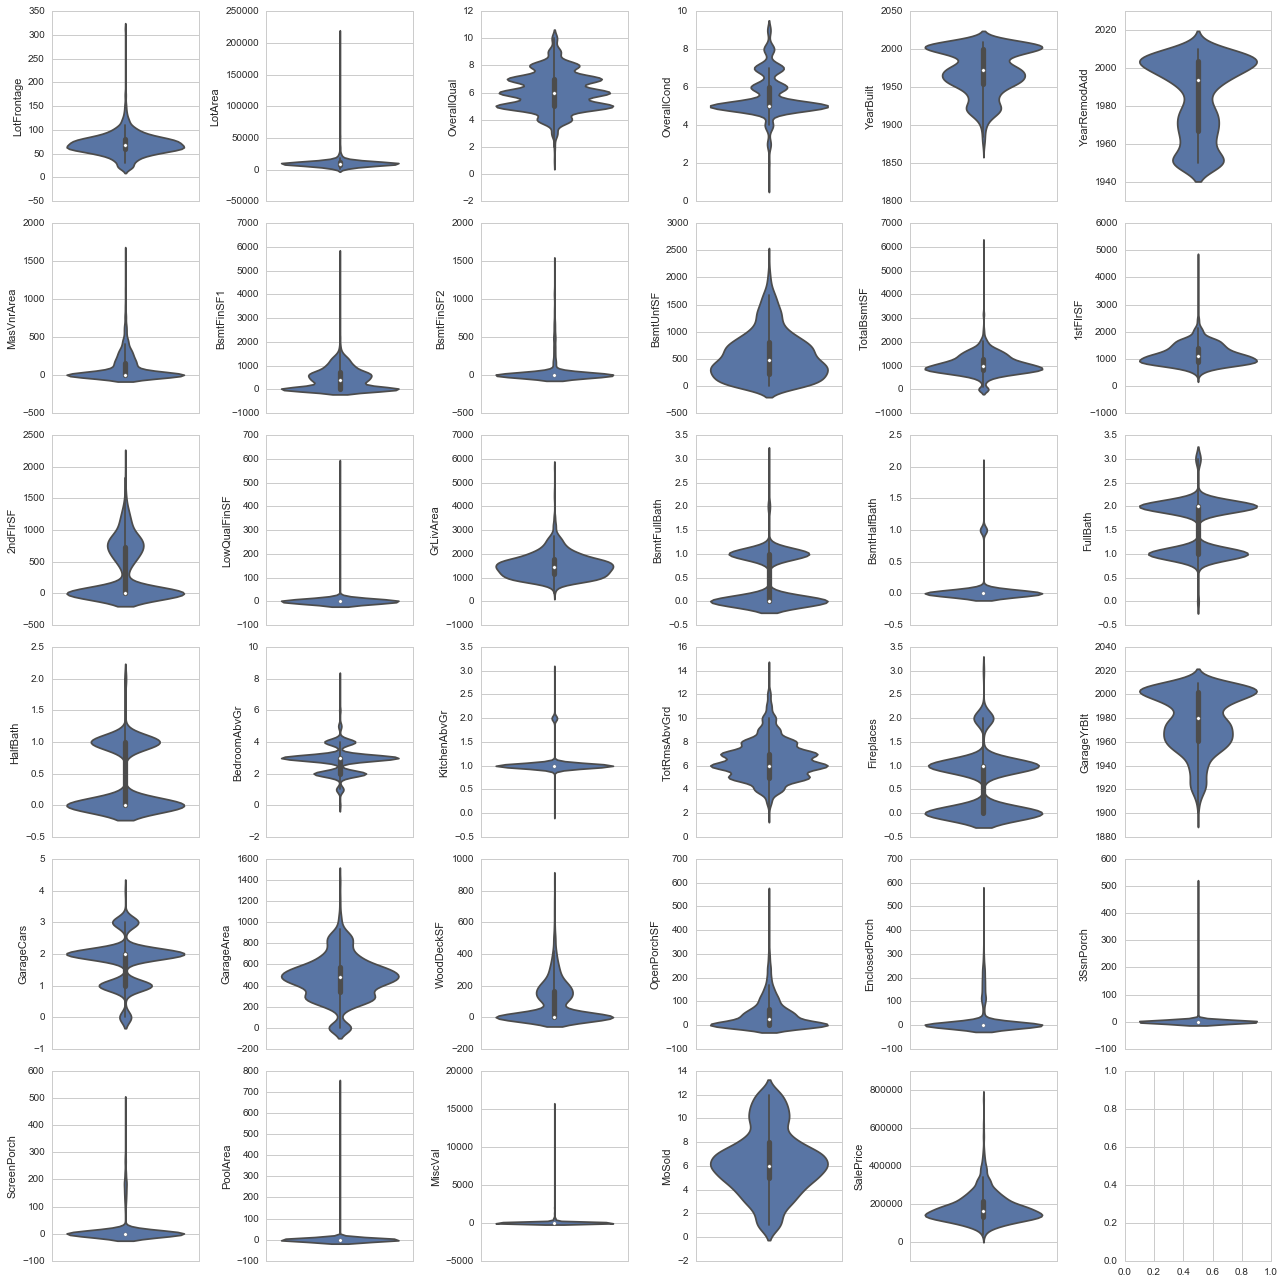

In [6]:
#Use Violin Plots to Visulize the Quantitative Data
#This will be useful in visualizing skewness and outliers, as well as to get a general grasp on the data

sns.set_style("whitegrid")
number_rows = 6
number_columns = 6
d_count = 0
e_count = 0
violin_column = []

for d in train_data.columns:
    if train_data[d].dtypes <> 'object' and d <> 'Id':
        violin_column.append(d)
        d_count += 1

fig, ax = plt.subplots(nrows = number_rows, ncols = number_columns, figsize=(18,18))
for b in range(0, number_rows):
    for c in range(0, number_columns):
        if e_count < 35:
            sns.violinplot(y=train_data[violin_column[e_count]], ax=ax[b,c])            
            e_count += 1
plt.tight_layout()

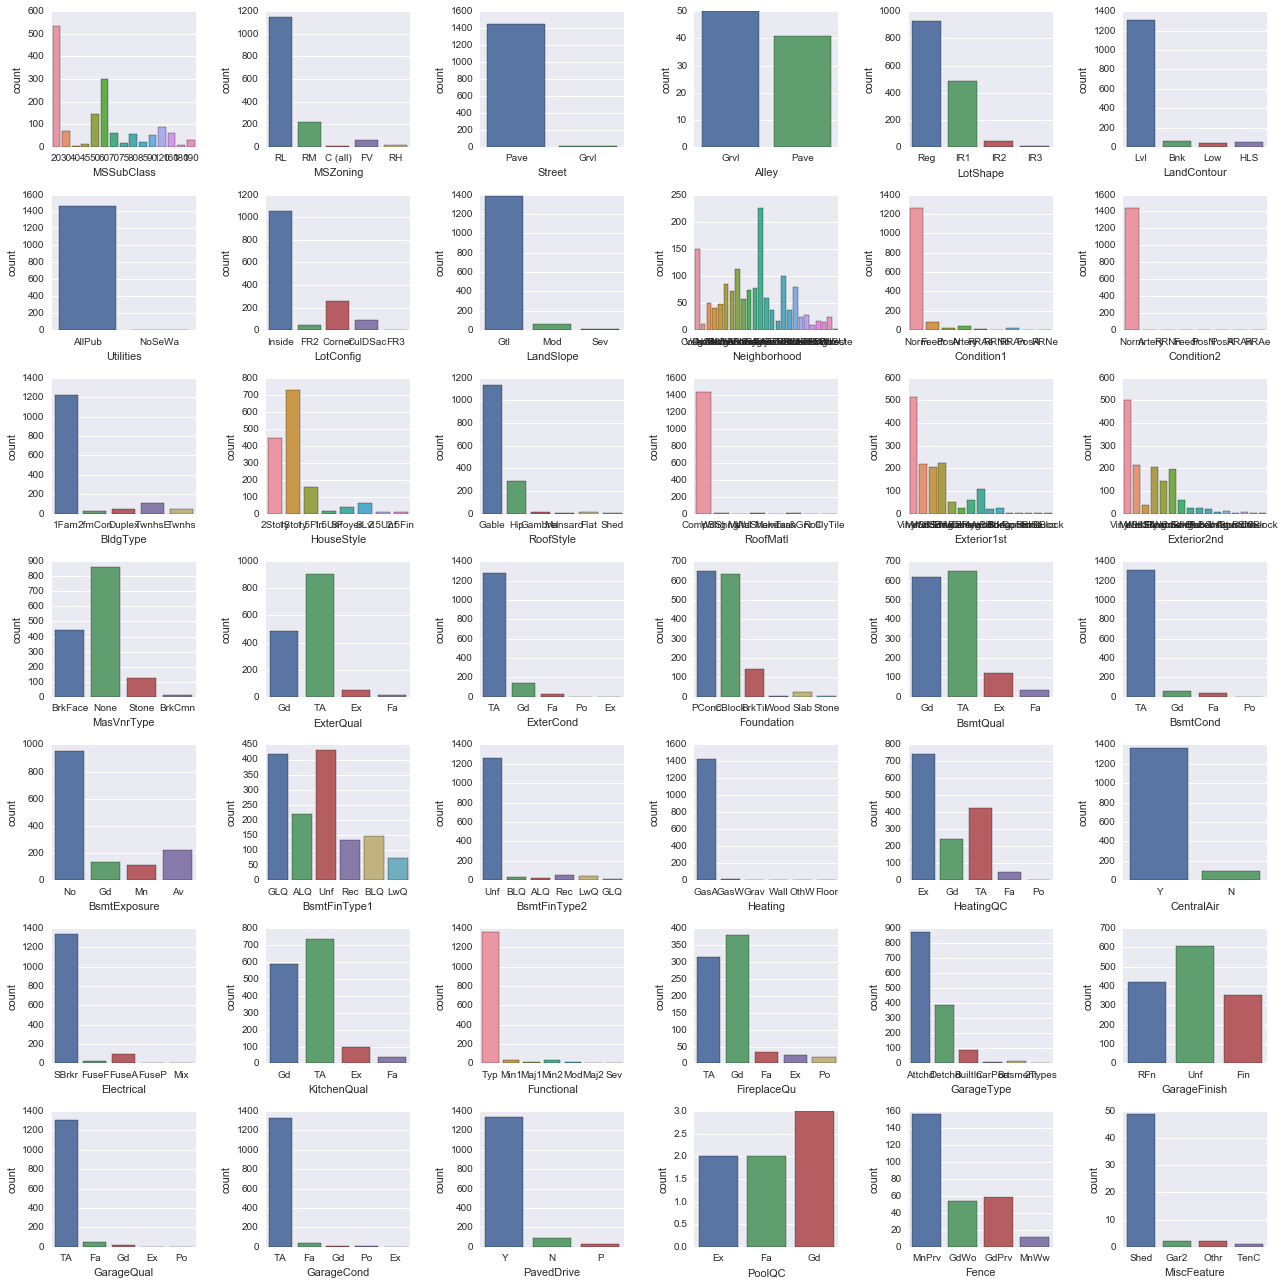

In [7]:
#Use Bar Charts to Visulize the Categorical Data
#this will be useful in determining distribution of the data - may be used to help fill in NAs

sns.set(style="darkgrid")
number_rows = 7
number_columns = 6
f_count = 0
i_count = 0
barchart_column = []

for f in train_data.columns:
    if train_data[f].dtypes == 'object' and f <> 'Id':
        barchart_column.append(f)
        f_count += 1

fig, ax = plt.subplots(nrows = number_rows, ncols = number_columns, figsize=(18,18))
for g in range(0, number_rows):
    for h in range(0, number_columns):
        sns.countplot(x=train_data[barchart_column[i_count]], data=train_data, ax=ax[g,h])            
        i_count += 1
plt.tight_layout()

In [8]:
# Correlation for Quantitative Features Only
pearson = train_data.corr(method='pearson')
j_count = 0

# Since the target attr is the last, remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
corr_with_target_dict = corr_with_target.to_dict()

# List the attributes sorted from the most predictive by their correlation with Sale Price
print("FEATURE \tCORRELATION")
for attr in sorted(corr_with_target_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*attr))
    j_count += 1
    if j_count > 9:
        break

FEATURE 	CORRELATION
OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111


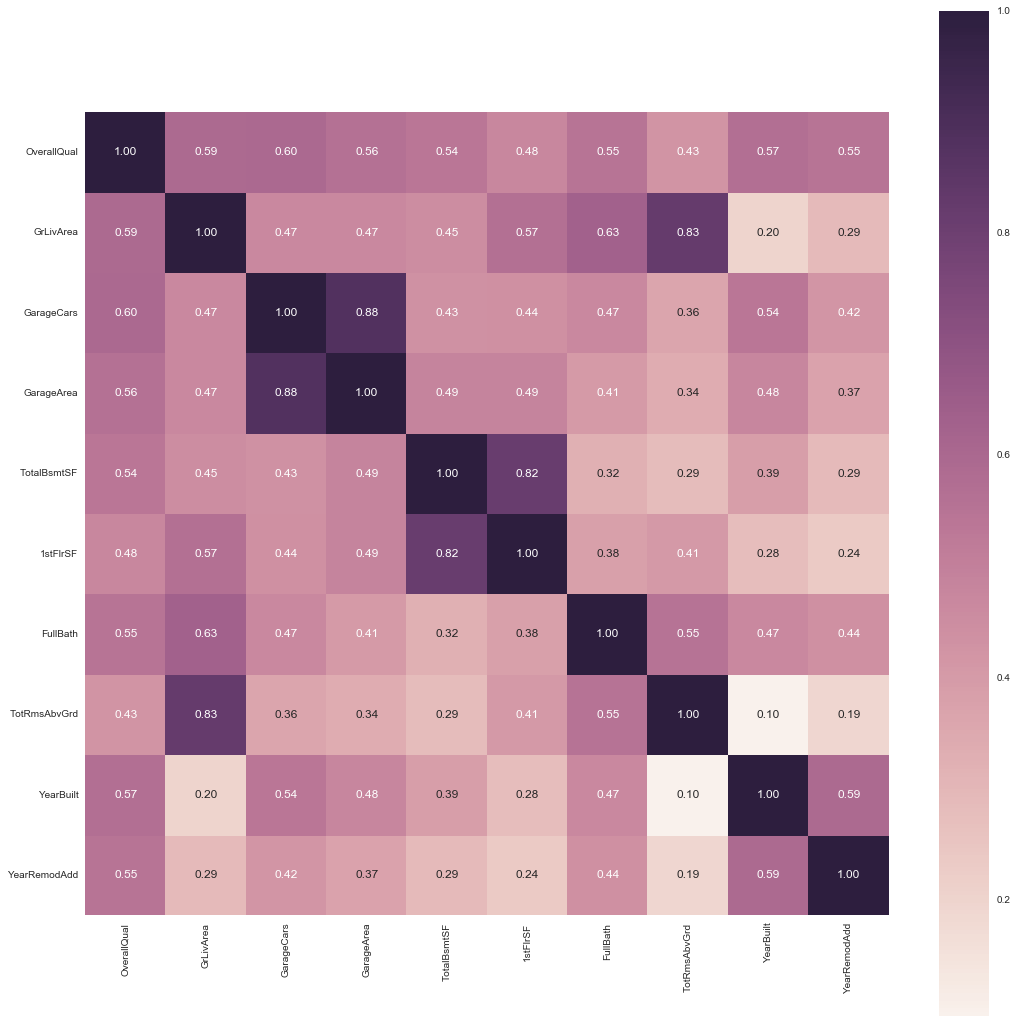

In [9]:
#create a heatmap to see highly correlated features

def heatmap(df,labels):

    cm = np.corrcoef(df[labels].dropna().values.T)
    sns.set(font_scale = 1)
    hm = sns.heatmap( cm
                    ,cbar = True
                    ,annot = True
                    ,square = True
                    ,fmt = '.2f'
                    )
    hm.set_xticklabels(labels,rotation = 90)
    hm.set_yticklabels(labels[::-1],rotation = 0)
    
    return hm,cm

corrfeats = [
             'OverallQual'
            ,'GrLivArea'
            ,'GarageCars'
            ,'GarageArea'
            ,'TotalBsmtSF'
            ,'1stFlrSF'
            ,'FullBath'
            ,'TotRmsAbvGrd'
            ,'YearBuilt'
            ,'YearRemodAdd'
            ]

train1 = pd.get_dummies(train_data)

plt.figure(figsize = (18, 18))
htmp, corrm = heatmap(train1, corrfeats)

In [10]:
# It would also be interesting to understand strong correlations between attribute pairs.

attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {(YearBuilt, YearRemodAdd): 0.592855, (1stFlrSF, GrLivArea): 0.566024, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair                   correlation
# 0     (OverallQual, TotalBsmtSF)     0.537808
# 1     (GarageArea, GarageCars)	   0.882475
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['Attribute Pair', 'Correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs[:5]

Attribute Pair  Correlation
14   (GarageArea, GarageCars)     0.882475
18   (GarageYrBlt, YearBuilt)     0.825667
6   (GrLivArea, TotRmsAbvGrd)     0.825489
22    (1stFlrSF, TotalBsmtSF)     0.819530
7       (2ndFlrSF, GrLivArea)     0.687501

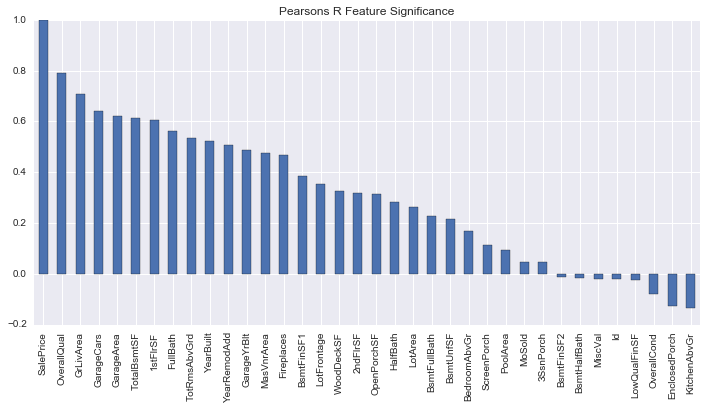

In [11]:
# Basic Pearson's R
# from scipy.stats.stats import pearsonr (fancier Pearson's R output)
# this is used to quickly see what id most correlated with SalePrice

# Find all categorical data
data_categorical = []
for col in train_data.columns.values:
    if train_data[col].dtype == 'object':
        data_categorical.append(col)

# Separate Contiuous from Categorical Data
df_continuous = train_data.drop(data_categorical, axis=1)
df_categorical = train_data[data_categorical]

import matplotlib.pyplot as pr_plt
pr = df_continuous.corr()

pr_plt.figure(figsize=(10, 5))
pr_plt.title('Pearsons R Feature Significance')
pr_plt.tight_layout()

pr_coef = pd.Series(pr.SalePrice,
                    index = df_continuous.columns
                   ).sort_values(ascending=False)
pr_coef.plot(kind='bar')

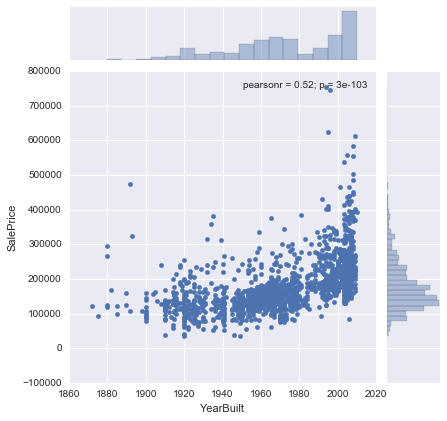

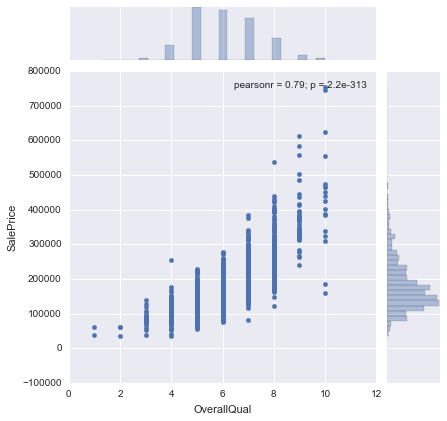

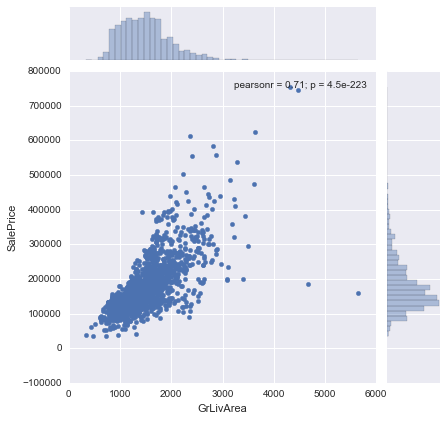

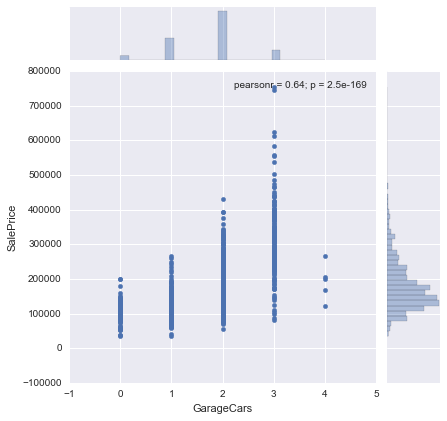

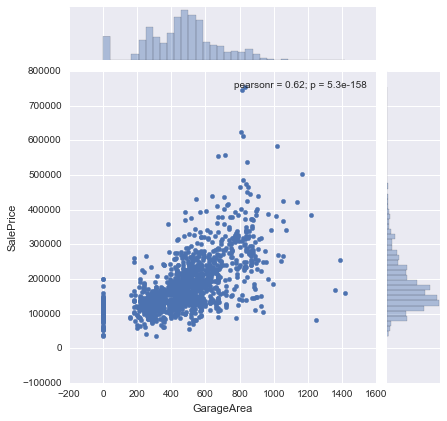

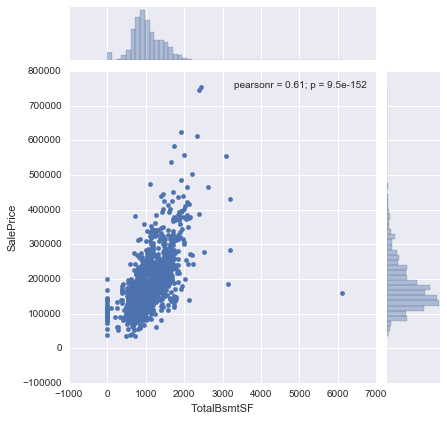

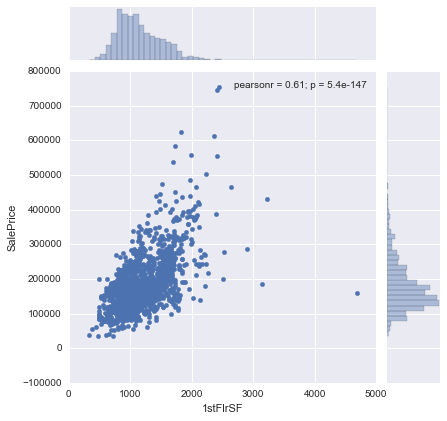

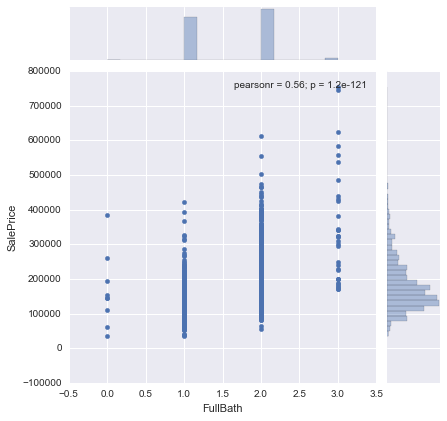

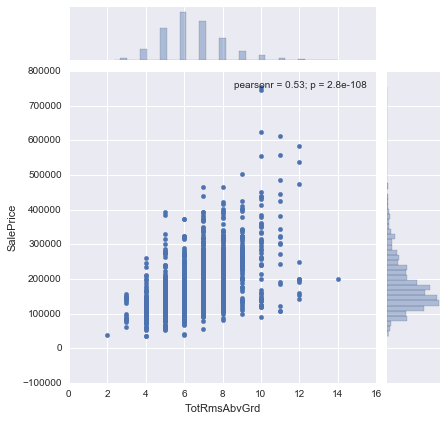

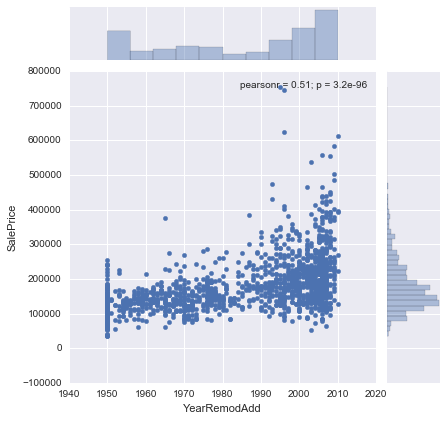

In [12]:
# Create Joint Plots - Useful for Visual Outlier detection for SalePrice
sns.jointplot(train_data['YearBuilt'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['OverallQual'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['GrLivArea'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['GarageCars'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['GarageArea'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['TotalBsmtSF'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['1stFlrSF'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['FullBath'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['TotRmsAbvGrd'], train_data['SalePrice'], kind='scatter')
sns.jointplot(train_data['YearRemodAdd'], train_data['SalePrice'], kind='scatter')           

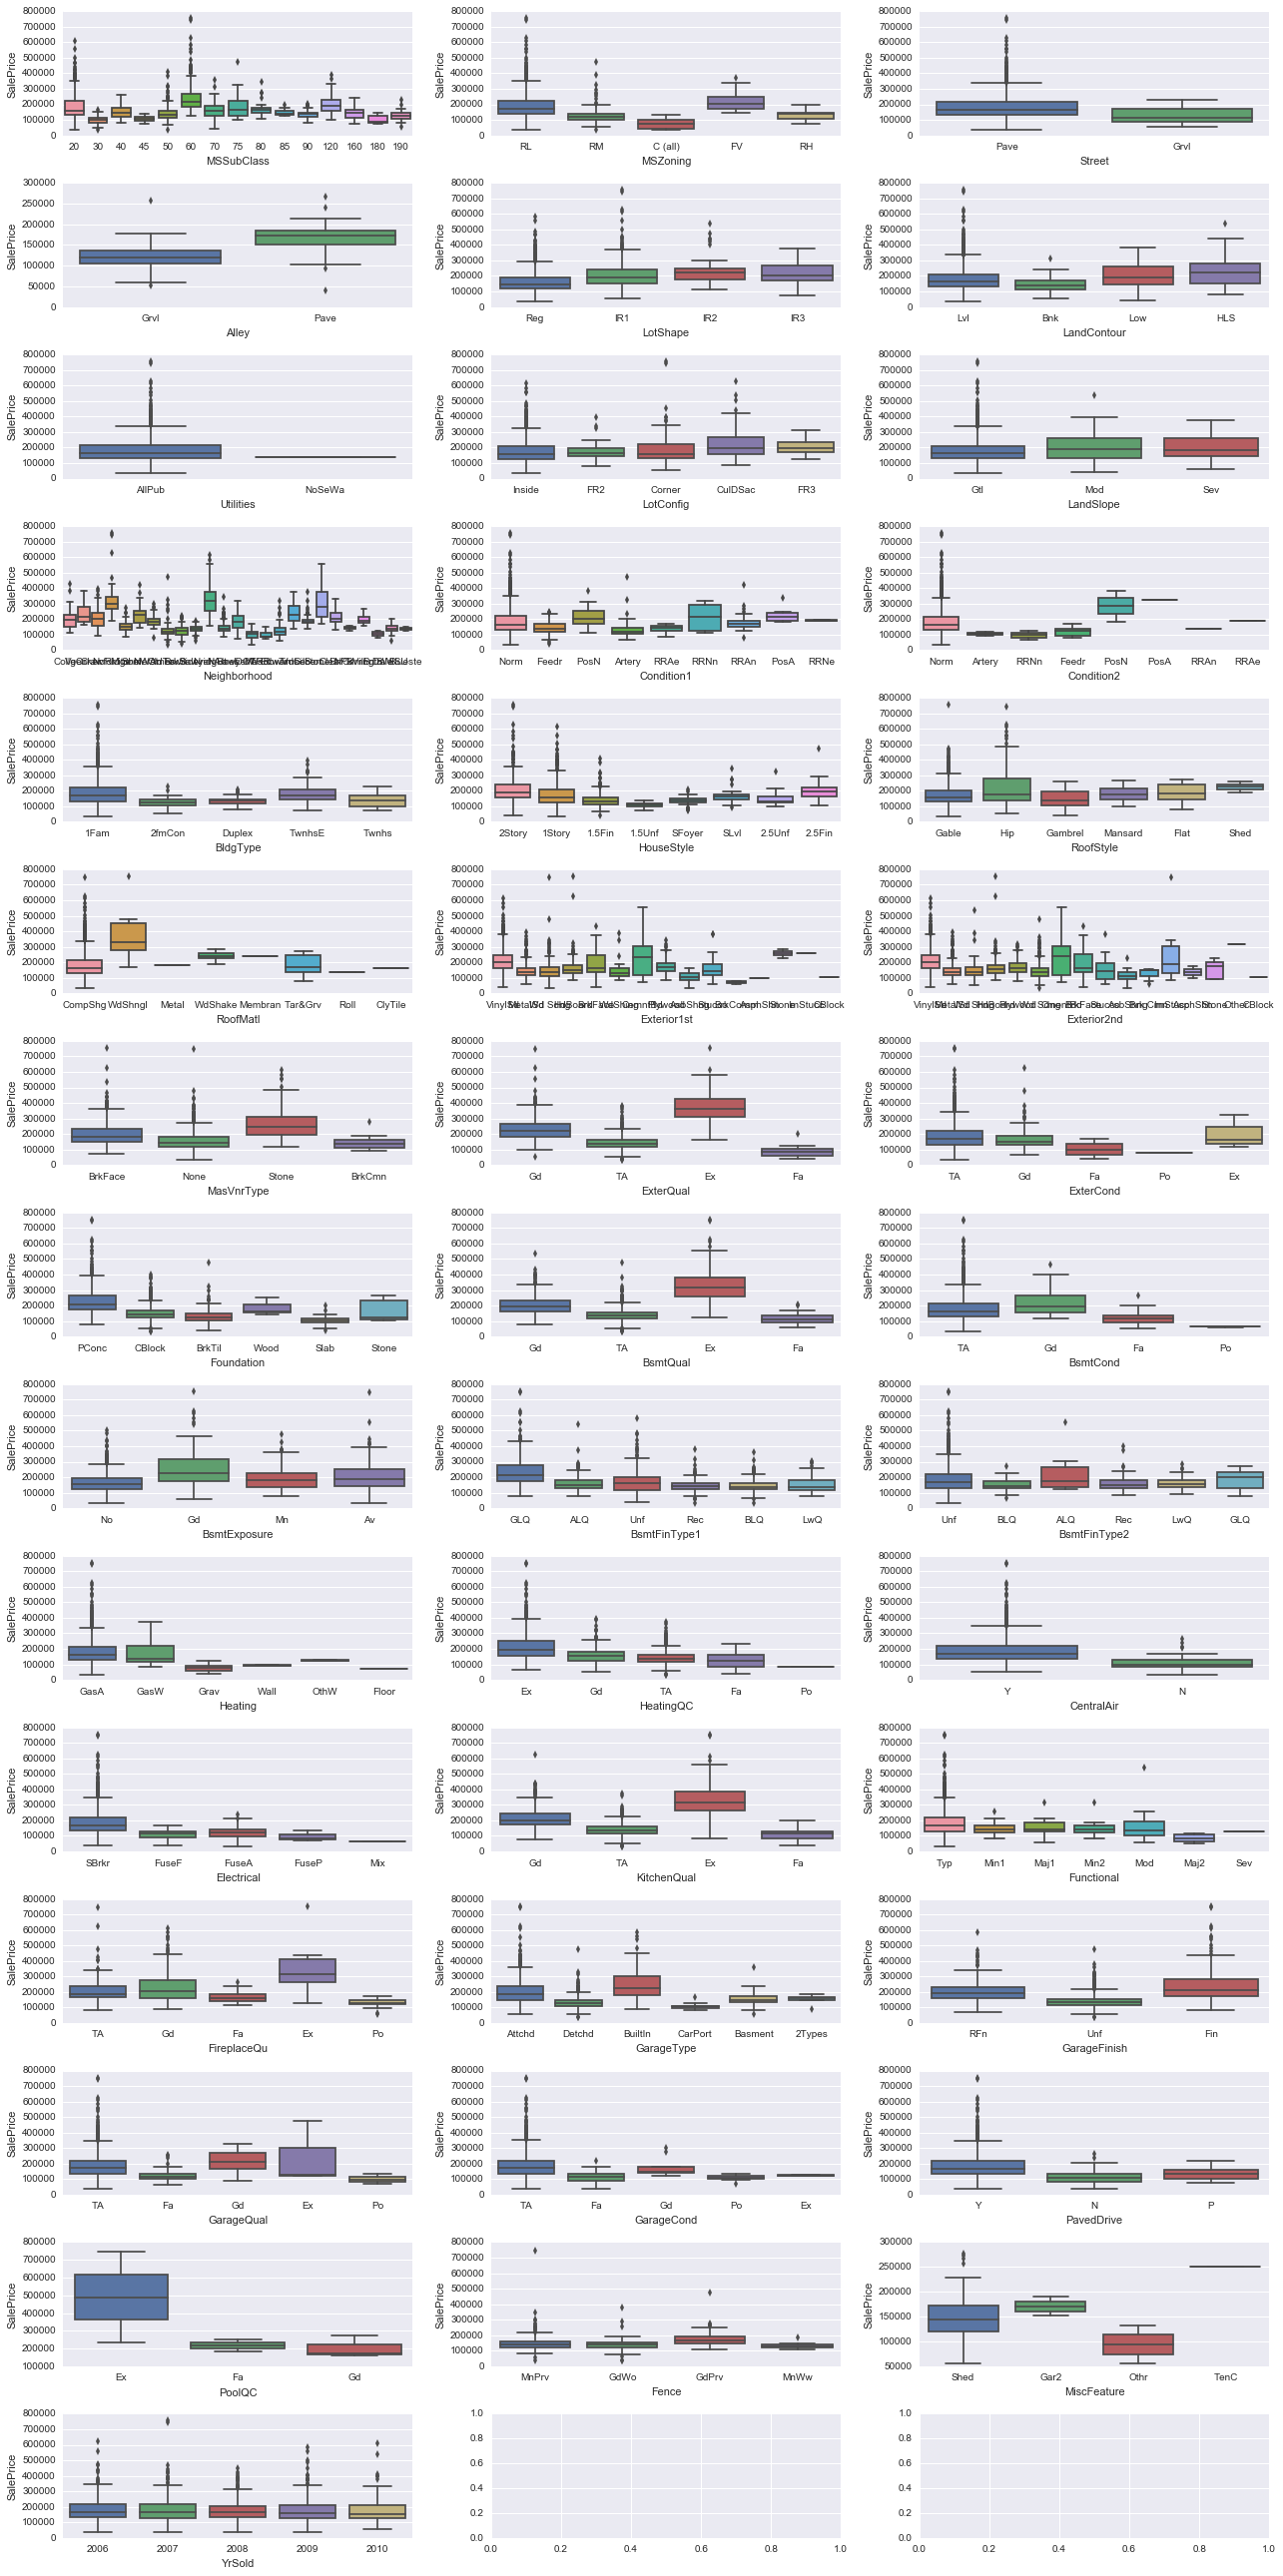

In [13]:
# Categorical Features relation to Sale Price
number_rows = 15
number_columns = 3
m_count = 0
k_count = 0
boxplot_column = []

fig, ax = plt.subplots(nrows = number_rows, ncols = number_columns, figsize=(18,36))

for m in train_data.columns:
    if train_data[m].dtypes == 'object' and f <> 'Id':
        boxplot_column.append(m)
        m_count += 1

for k in range(0, number_rows):
    for l in range(0, number_columns):
        if k_count < 43:
            sns.boxplot(x=train_data[boxplot_column[k_count]], y = 'SalePrice', data=train_data, ax=ax[k,l])
        k_count += 1
plt.tight_layout()

## DATA CLEANUP AND MANIPULATION:

In [14]:
#display data and shapes
print ("TRAIN DATA AND SHAPE:", train_data.shape)
display(train_data.head(5))
print ("TEST DATA AND SHAPE:", test_data.shape)

display(test_data.head(5))

('TRAIN DATA AND SHAPE:', (1460, 81))


Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave   NaN      Reg   
1   2         20       RL         80.0     9600   Pave   NaN      Reg   
2   3         60       RL         68.0    11250   Pave   NaN      IR1   
3   4         70       RL         60.0     9550   Pave   NaN      IR1   
4   5         60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

('TEST DATA AND SHAPE:', (1459, 80))


Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461         20       RH         80.0    11622   Pave   NaN      Reg   
1  1462         20       RL         81.0    14267   Pave   NaN      IR1   
2  1463         60       RL         74.0    13830   Pave   NaN      IR1   
3  1464         60       RL         78.0     9978   Pave   NaN      IR1   
4  1465        120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd        

In [15]:
"""KO ADDED 12-3-16"""

### OUTLIER DETECTION 1 - LOOKING FOR MIS-TYPED OR INCORRECT ENTRIES ###
# Using violin plots from above as a guide for features with potential serious outliers, explore data with significant outlier values
# Looking for mis-entered values
Lot_Area_OLs = train_data[train_data['LotArea']>100000]
display("Lot_Area_OLs",Lot_Area_OLs)   # these values much > median, but top vals are similar (no single outlier far exceeds)
MasVnrArea_OLs = train_data[train_data['MasVnrArea']>1000]
display("MasVnrArea_OLs", MasVnrArea_OLs) # these values much > median, but top vals are similar (no single outlier far exceeds)
LowQualFinSF_OLs = train_data[train_data['LowQualFinSF']>500]
display("LowQualFinSF_OLs", LowQualFinSF_OLs)   # these values much > median, but top vals are similar (no single outlier far exceeds)
EnclosedPorch_OLs = train_data[train_data['EnclosedPorch']>400]
display("EnclosedPorch_OLs", EnclosedPorch_OLs) # these values much > median, but top vals are similar (no single outlier far exceeds)
ThreeSsnPorch_OLs = train_data[train_data['3SsnPorch']>400]
display("ThreeSsnPorch_OLs", ThreeSsnPorch_OLs) # these values much > median, but top vals are similar (no single outlier far exceeds)
ScreenPorch_OLs = train_data[train_data['ScreenPorch']>400]
display("ScreenPorch_OLs", ScreenPorch_OLs) # these values much > median, but top vals are similar (no single outlier far exceeds)
PoolArea_OLs = train_data[train_data['PoolArea']>500]
display("PoolArea_OLs",PoolArea_OLs) # these values much > median, but top vals are similar (no single outlier far exceeds)
MiscVal_OLs = train_data[train_data['MiscVal']>5000]
display("MiscVal_OLs",MiscVal_OLs)  #while large miscvals, figures are reasonable and do not seem to disproportionally impact Sales Price

### Conclusion - no crucial mis-entered values. Notes above next to each line explain why.
### Okay to process to next set of outlier detection

'Lot_Area_OLs'

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249  250         50       RL          NaN   159000   Pave   NaN      IR2   
313  314         20       RL        150.0   215245   Pave   NaN      IR3   
335  336        190       RL          NaN   164660   Grvl   NaN      IR1   
706  707         20       RL          NaN   115149   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
249         Low    AllPub   CulDSac       Sev      ClearCr       Norm   
313         Low    AllPub    Inside       Sev       Timber       Norm   
335         HLS    AllPub    Corner       Sev       Timber       Norm   
706         Low    AllPub   CulDSac       Sev      ClearCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
249       Norm     1Fam     1.5Fin            6            7       1958   
313       Norm     1Fam     1Story            7            5       1965   
335       Norm   2fmCon     1.5Fin            5            6       1965   
706       Norm     1Fam     1Story            7            5       1971   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
249          2006     Gable  CompShg     Wd Sdng     HdBoard     BrkCmn   
313          1965       Hip  CompShg     BrkFace     BrkFace       None   
335          1965     Gable  CompShg     Plywood     Plywood       None   
706          2002     Gable  CompShg     Plywood     Plywood      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
249       472.0        Gd        TA     CBlock       Gd       TA           Gd   
313         0.0        TA        TA     CBlock       Gd       TA           Gd   
335         0.0        TA        TA     CBlock       TA       TA           Gd   
706       351.0        TA        TA     CBlock       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
249          Rec         697          Unf           0        747         1444   
313          ALQ        1236          Rec         820         80         2136   
335          ALQ        1249          BLQ         147        103         1499   
706          GLQ        1219          Unf           0        424         1643   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
249    GasA        Gd          Y      SBrkr      1444       700             0   
313    GasW        TA          Y      SBrkr      2036         0             0   
335    GasA        Ex          Y      SBrkr      1619       167             0   
706    GasA        TA          Y      SBrkr      1824         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
249       2144             0             1         2         0             4   
313       2036             2             0         2         0             3   
335       1786             2             0         2         0             3   
706       1824             1             0         2         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
249             1          Gd             7        Typ           2   
313             1          TA             8        Typ           2   
335             1          TA             7        Typ           2   
706             1          Gd             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
249          TA     Attchd       1958.0          Fin           2         389   
313          Gd     Attchd       1965.0          RFn           2         513   
335          Gd     Attchd       1965.0          Fin           2         529   
706          TA     Attchd       1971.0          Unf           2         739   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
249         TA         TA          Y           0        

'MasVnrArea_OLs'

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58      59         60       RL         66.0    13682   Pave   NaN      IR2   
70      71         20       RL         95.0    13651   Pave   NaN      IR1   
115    116        160       FV         34.0     3230   Pave  Pave      Reg   
297    298         60       FV         66.0     7399   Pave  Pave      IR1   
691    692         60       RL        104.0    21535   Pave   NaN      IR1   
808    809         80       RL         85.0    13400   Pave   NaN      Reg   
1169  1170         60       RL        118.0    35760   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
58           HLS    AllPub   CulDSac       Gtl      StoneBr       Norm   
70           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
115          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
297          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
808          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1169         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
58         Norm     1Fam     2Story           10            5       2006   
70         Norm     1Fam     1Story            7            6       1973   
115        Norm   TwnhsE     2Story            6            5       1999   
297        Norm     1Fam     2Story            7            5       1997   
691        Norm     1Fam     2Story           10            6       1994   
808        Norm     1Fam       SLvl            5            5       1966   
1169       Norm     1Fam     2Story           10            5       1995   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
58            2006       Hip  CompShg     VinylSd     VinylSd    BrkFace   
70            1973     Gable  CompShg     Plywood     Plywood    BrkFace   
115           1999     Gable  CompShg     MetalSd     MetalSd    BrkFace   
297           1998       Hip  CompShg     VinylSd     VinylSd    BrkFace   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
808           1966     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1169          1996       Hip  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
58        1031.0        Ex        TA      PConc       Ex       TA   
70        1115.0        TA        Gd     CBlock       Gd       TA   
115       1129.0        TA        TA      PConc       Gd       TA   
297       1600.0        Gd        TA      PConc       Gd       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
808       1047.0        TA        TA     CBlock       TA       TA   
1169      1378.0        Gd        Gd      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
58             Gd          Unf           0          Unf           0   
70             Gd          ALQ        1880          Unf           0   
115            No          GLQ         419          Unf           0   
297            No          BLQ         649          Unf           0   
691            Gd          GLQ        1455          Unf           0   
808            Av          ALQ         516          BLQ         128   
1169           Gd          GLQ        1387          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
58         1410         1410    GasA        Ex          Y      SBrkr   
70          343         2223    GasA        Ex          Y      SBrkr   
115         310          729    GasA        Gd          Y      SBrkr   
297         326          975    GasA        Ex          Y      SBrkr   
691         989         2444    GasA        Ex          Y      SBrkr   
808         380   

'LowQualFinSF_OLs'

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
88      89         50  C (all)        105.0     8470   Pave   NaN      IR1   
170    171         50       RM          NaN    12358   Pave   NaN      IR1   
185    186         75       RM         90.0    22950   Pave   NaN      IR2   
635    636        190       RH         60.0    10896   Pave  Pave      Reg   
1009  1010         50       RL         60.0     6000   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
88           Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
170          Lvl    AllPub    Inside       Gtl      OldTown      Feedr   
185          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
635          Bnk    AllPub    Inside       Gtl        SWISU      Feedr   
1009         Lvl    AllPub    Inside       Gtl        SWISU       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
88        Feedr     1Fam     1.5Fin            3            2       1915   
170        Norm     1Fam     1.5Fin            5            6       1941   
185        Norm     1Fam     2.5Fin           10            9       1892   
635        Norm   2fmCon     2.5Fin            6            7       1914   
1009       Norm     1Fam     1.5Fin            5            5       1926   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
88            1982       Hip  CompShg     Plywood     Plywood       None   
170           1950     Gable  CompShg     MetalSd     MetalSd       None   
185           1993     Gable  WdShngl     Wd Sdng     Wd Sdng       None   
635           1995       Hip  CompShg     VinylSd     VinylSd       None   
1009          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
88           0.0        Fa        Fa     CBlock       TA       Fa   
170          0.0        TA        TA     CBlock       TA       TA   
185          0.0        Gd        Gd     BrkTil       TA       TA   
635          0.0        Fa        TA     CBlock       TA       Fa   
1009         0.0        TA        Fa     BrkTil       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
88             No          Unf           0          Unf           0   
170            No          Rec         360          Unf           0   
185            Mn          Unf           0          Unf           0   
635            No          LwQ         256          Unf           0   
1009           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
88         1013         1013    GasA        TA          N      SBrkr   
170         360          720    GasA        TA          Y      SBrkr   
185        1107         1107    GasA        Ex          Y      SBrkr   
635        1184         1440    GasA        Ex          Y      FuseA   
1009       1008         1008    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
88        1013         0           513       1526             0             0   
170        854         0           528       1382             0             0   
185       1518      1518           572       3608             0             0   
635       1440      1440           515       3395             0             0   
1009      1008         0           514       1522             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
88           1         0             2             1          Fa   
170          1         1             2             1          TA   
185          2         1             4             1          Ex   
635          2         0             8             2          Fa   
1009         2         0             4             1          TA   

      Tot

'EnclosedPorch_OLs'

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197  198         75       RL        174.0    25419   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
197         Lvl    AllPub    Corner       Gtl        NAmes     Artery   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
197       Norm     1Fam     2Story            8            4       1918   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
197          1990     Gable  CompShg      Stucco      Stucco       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
197         0.0        Gd        Gd      PConc       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
197          GLQ        1036          LwQ         184        140         1360   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
197    GasA        Gd          Y      SBrkr      1360      1360           392   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
197       3112             1             1         2         0             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
197             1          Gd             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
197          Ex     Detchd       1918.0          Unf           2         795   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
197         TA         TA          Y           0           16            552   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
197          0            0       512     Ex  GdPrv         NaN        0   

     MoSold YrSold SaleType SaleCondition  SalePrice  
197       3   2006       WD       Abnorml     235000

'ThreeSsnPorch_OLs'

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
55    56         20       RL        100.0    10175   Pave   NaN      IR1   
205  206         20       RL         99.0    11851   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
55          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
205         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
55        Norm     1Fam     1Story            6            5       1964   
205       Norm     1Fam     1Story            7            5       1990   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
55           1964     Gable  CompShg     HdBoard     Plywood    BrkFace   
205          1990     Gable  CompShg     HdBoard     HdBoard       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
55        272.0        TA        TA     CBlock       TA       TA           No   
205         0.0        TA        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
55           BLQ         490          Unf           0        935         1425   
205          Unf           0          Unf           0       1424         1424   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
55     GasA        Gd          Y      SBrkr      1425         0             0   
205    GasA        Ex          Y      SBrkr      1442         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
55        1425             0             0         2         0             3   
205       1442             0             0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
55              1          TA             7        Typ           1   
205             1          TA             5        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
55           Gd     Attchd       1964.0          RFn           2         576   
205         NaN     Attchd       1990.0          RFn           2         500   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
55          TA         TA          Y           0            0              0   
205         TA         TA          Y           0           34              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
55         407            0         0    NaN   NaN         NaN        0   
205        508            0         0    NaN   NaN         NaN        0   

     MoSold YrSold SaleType SaleCondition  SalePrice  
55        7   2008       WD        Normal     180500  
205       5   2009       WD        Normal     180500

'ScreenPorch_OLs'

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185    186         75       RM         90.0    22950   Pave   NaN      IR2   
1328  1329         50       RM         60.0    10440   Pave  Grvl      Reg   
1386  1387         60       RL         80.0    16692   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
1328         Lvl    AllPub    Corner       Gtl      OldTown       Norm   
1386         Lvl    AllPub    Inside       Gtl       NWAmes       RRAn   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185        Norm     1Fam     2.5Fin           10            9       1892   
1328       Norm     1Fam     1.5Fin            6            7       1920   
1386       Norm     1Fam     2Story            7            5       1978   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185           1993     Gable  WdShngl     Wd Sdng     Wd Sdng       None   
1328          1950     Gable  CompShg     BrkFace     Wd Sdng       None   
1386          1978     Gable  CompShg     Plywood     Plywood    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
185          0.0        Gd        Gd     BrkTil       TA       TA   
1328         0.0        Gd        Gd     BrkTil       Gd       TA   
1386       184.0        TA        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
185            Mn          Unf           0          Unf           0   
1328           No          LwQ         493          Unf           0   
1386           No          BLQ         790          LwQ         469   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
185        1107         1107    GasA        Ex          Y      SBrkr   
1328       1017         1510    GasW        Ex          Y      SBrkr   
1386        133         1392    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
185       1518      1518           572       3608             0             0   
1328      1584      1208             0       2792             0             0   
1386      1392      1392             0       2784             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
185          2         1             4             1          Ex   
1328         2         0             5             1          TA   
1386         3         1             5             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
185             12        Typ           2          TA     Detchd       1993.0   
1328             8        Mod           2          TA     Detchd       1920.0   
1386            12        Typ           2          TA     Attchd       1978.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
185           Unf           3         840         Ex         TA          Y   
1328          Unf           2         520         Fa         TA          Y   
1386          RFn           2         564         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
185            0          260              0          0          410   
1328           0          547              0          0          480   
1386           0          112              0          0          440   

      PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold YrSold SaleType  \
185          0    NaN  GdPrv         NaN        0       6   2006       WD   
1328         0    NaN  MnPrv        Shed     1150       6   2008       WD   
1386       519     Fa  MnPrv        TenC     2000       7   2006       WD   

     SaleCondition  SalePrice  
185         Normal     475000  
1328        Normal     256000  
1386   

'PoolArea_OLs'

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198         75       RL        174.0    25419   Pave   NaN      Reg   
810    811         20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171         80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183         60       RL        160.0    15623   Pave   NaN      IR1   
1386  1387         60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424         80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
197          Lvl    AllPub    Corner       Gtl        NAmes     Artery   
810          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1170         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1386         Lvl    AllPub    Inside       Gtl       NWAmes       RRAn   
1423         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
197        Norm     1Fam     2Story            8            4       1918   
810        Norm     1Fam     1Story            6            6       1974   
1170       Norm     1Fam       SLvl            6            6       1977   
1182       Norm     1Fam     2Story           10            5       1996   
1386       Norm     1Fam     2Story            7            5       1978   
1423       Norm     1Fam       SLvl            6            7       1966   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
197           1990     Gable  CompShg      Stucco      Stucco       None   
810           1999       Hip  CompShg     HdBoard     HdBoard    BrkFace   
1170          1977     Gable  CompShg     Plywood     Plywood       None   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1386          1978     Gable  CompShg     Plywood     Plywood    BrkFace   
1423          1966      Flat  Tar&Grv     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
197          0.0        Gd        Gd      PConc       TA       TA   
810         99.0        TA        TA     CBlock       TA       TA   
1170         0.0        TA        TA     CBlock       TA       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1386       184.0        TA        TA     CBlock       Gd       TA   
1423         0.0        Gd        Gd     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
197            No          GLQ        1036          LwQ         184   
810            No          ALQ         663          LwQ         377   
1170           Av          ALQ         522          Unf           0   
1182           Av          GLQ        2096          Unf           0   
1386           No          BLQ         790          LwQ         469   
1423           Av          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
197         140         1360    GasA        Gd          Y      SBrkr   
810           0         1040    GasA        Fa          Y      SBrkr   
1170        574         1096    GasA        TA          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
1386        133         1392    GasA        TA          Y      SBrkr   
1423        697          697    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
197       1360      1360           392       3112             1             1   
810       1309         0             0       1309             1             0   
1170      1118         0             0       1118             1             0   
1182      2411      2065             0       4476             1  

'MiscVal_OLs'

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
346    347         20       RL          NaN    12772   Pave   NaN      IR1   
1230  1231         90       RL          NaN    18890   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
346          Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
1230         Lvl    AllPub    Inside       Gtl       Sawyer      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
346        Norm     1Fam     1Story            6            8       1960   
1230       RRAe   Duplex     1.5Fin            5            5       1977   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
346           1998       Hip  CompShg     MetalSd     MetalSd       None   
1230          1977      Shed  CompShg     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
346          0.0        TA        Gd     CBlock       TA       TA   
1230         1.0        TA        TA     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
346            Mn          BLQ         498          Unf           0   
1230           No          GLQ         498          Rec         211   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
346         460          958    GasA        TA          Y      SBrkr   
1230        652         1361    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
346        958         0             0        958             0             0   
1230      1361      1259             0       2620             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
346          1         0             2             1          TA   
1230         2         2             4             2          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
346              5        Typ           0         NaN     Attchd       1960.0   
1230            12        Typ           1          TA    BuiltIn       1977.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
346           RFn           1         301         TA         TA          Y   
1230          RFn           2         600         TA         TA          N   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
346            0            0              0          0            0   
1230         155           24            145          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold YrSold SaleType  \
346          0    NaN   NaN        Gar2    15500       4   2007       WD   
1230         0    NaN   NaN        Gar2     8300       8   2007       WD   

     SaleCondition  SalePrice  
346         Normal     151500  
1230        Normal     190000

In [16]:
"""KO ADDED 12-3-16"""

#OUTLIER DETECTION 2 - UNEXPECTED / SKEWED PRICING
## Using scatter plots as a guide for which homes sold for unexpected prices, we can look for data to potentially remove from train

def price_outlier_checker(df, df_subset1, df_pricethreshold) :
    PriceOLs = df[(df_subset1) & (df_pricethreshold)]
    display(PriceOLs)
    print ("ID OF PRICE OUTLIER(s):", PriceOLs['Id'].tolist())
    print ("PRICE OF PRICE OUTLIER(s):", PriceOLs['SalePrice'].tolist(),
           "PRICE OF COMPARABLES:", '{0:.0f}'.format(df['SalePrice'][df_subset1].mean()))
    print ("GRLIVAREA OF PRICE OUTLIER(s):", PriceOLs['GrLivArea'].tolist(),
           "GRLIVAREA OF COMPARABLES:", '{0:.0f}'.format(df['GrLivArea'][df_subset1].mean()))
    print ("OVERALLQUAL OF PRICE OUTLIER(s):", PriceOLs['OverallQual'].tolist(),
           "OVERALLQUAL OF COMPARABLES:", '{0:.1f}'.format(df['OverallQual'][df_subset1].mean()))
    print ("GARAGECARS OF PRICE OUTLIER(s):", PriceOLs['GarageCars'].tolist(),
           "GARAGECARS OF COMPARABLES:", '{0:.1f}'.format(df['GarageCars'][df_subset1].mean()))
    print ("LOWQUALFINSF OF PRICE OUTLIER(s):", PriceOLs['LowQualFinSF'].tolist(),
           "LOWQUALFINSF OF COMPARABLES:", '{0:.1f}'.format(df['LowQualFinSF'][df_subset1].mean()))
    print ("YEARBUILT OF PRICE OUTLIER(s):", PriceOLs['YearBuilt'].tolist(),
           "YEARBUILT OF COMPARABLES:", '{0:.0f}'.format(df['YearBuilt'][df_subset1].mean()))
    print ("SALETYPE OF PRICE OUTLIER(s):", PriceOLs['SaleType'].tolist())
    print ("SALECONDITION OF PRICE OUTLIER(s):", PriceOLs['SaleCondition'].tolist())
    print (" ")

# CHECK VISUAL PRICE OUTLIERS ON MOST HIGHLY CORRELATED TO PRICE FEATURES
# SEE IF VALID REASON WHY SEEMINGLY OVER/UNDERVALUED; IF NOT, OMIT FROM DATASET

#low price outliers
print ("LOW PRICE VISUAL OUTLIERS:")
print ("")

print("Abnormally Low Price Instance with YearBuilt > 2000")
print("REMOVE")
price_outlier_checker(train_data, train_data['YearBuilt']>2000, train_data['SalePrice']<100000)
# --> Likely driven by low sqft and low quality and abnormal sale. But still consider REMOVING.

print("Abnormally Low Price Instance with GrLivArea > 4000")
print("REMOVE")
price_outlier_checker(train_data, train_data['GrLivArea']>4000, train_data['SalePrice']<200000)
# --> Could be driven by partial sale. But is so extreme that we should REMOVE from data set.

print("Abnormally Low Price Instance with OverallQual == 10")
print("REMOVE")
price_outlier_checker(train_data, train_data['OverallQual']==10, train_data['SalePrice']<200000)
# --> Same IDs as GrLivArea < 4000. But is so extreme that we should REMOVE from data set.

#high price visual outliers
print ("")
print ("HIGH PRICE VISUAL OUTLIERS:")
print ("")

print("Abnormally High Price Instance with OverallQual == 8")
print("REMOVE")
price_outlier_checker(train_data, train_data['OverallQual']==8, train_data['SalePrice']>500000)
# --> Significantly larger than others with same overall quality. Also 3-car garage. But Overall Qual such
## --> a large driver in certain models that we should REMOVE.

print("Abnormally High Price Instance with OverallQual == 4")
print("REMOVE")
price_outlier_checker(train_data, train_data['OverallQual']==4, train_data['SalePrice']>200000)
# --> While somewhat better than other same OverallQual, not enough better. Should REMOVE.

print("Abnormally High Price Instance with GrLivArea < 1500")
print("REMOVE")
price_outlier_checker(train_data, train_data['GrLivArea']<1500, train_data['SalePrice']>375000)
# --> Higher quality than comparables, but not enough to justify the price. Should REMOVE.

#take IDs designated for removal, drop from dataset
IDs_for_removal = [1454,524,1299,770,458,689]

#drop outlier IDs from data frame
for outlier in IDs_for_removal:
    train_data = train_data[train_data["Id"]!=outlier]
    
print(train_data.shape)

##Note: Removal of these outliers had material impact on improving our RMSEs.

LOW PRICE VISUAL OUTLIERS:

Abnormally Low Price Instance with YearBuilt > 2000
REMOVE


Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1453  1454         20       RL         90.0    17217   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1453       Norm     1Fam     1Story            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1453          2006     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1453         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1453           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1453       1140         1140    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1453      1140         0             0       1140             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1453         1         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1453             6        Typ           0         NaN        NaN          NaN   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1453          NaN           0           0        NaN        NaN          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1453          36           56              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold YrSold SaleType  \
1453         0    NaN   NaN         NaN        0       7   2006       WD   

     SaleCondition  SalePrice  
1453       Abnorml      84500

('ID OF PRICE OUTLIER(s):', [1454])
('PRICE OF PRICE OUTLIER(s):', [84500], 'PRICE OF COMPARABLES:', '244527')
('GRLIVAREA OF PRICE OUTLIER(s):', [1140], 'GRLIVAREA OF COMPARABLES:', '1695')
('OVERALLQUAL OF PRICE OUTLIER(s):', [5], 'OVERALLQUAL OF COMPARABLES:', '7.4')
('GARAGECARS OF PRICE OUTLIER(s):', [0], 'GARAGECARS OF COMPARABLES:', '2.3')
('LOWQUALFINSF OF PRICE OUTLIER(s):', [0], 'LOWQUALFINSF OF COMPARABLES:', '0.7')
('YEARBUILT OF PRICE OUTLIER(s):', [2006], 'YEARBUILT OF COMPARABLES:', '2005')
('SALETYPE OF PRICE OUTLIER(s):', ['WD'])
('SALECONDITION OF PRICE OUTLIER(s):', ['Abnorml'])
 
Abnormally Low Price Instance with GrLivArea > 4000
REMOVE


Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524         60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299         60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn       2007.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
523          208          406              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold YrSold SaleType  \
523          0    NaN   NaN         NaN        0      10   2007      New   
1298       480     Gd   NaN         NaN        0       1   2008      New   

     SaleCondition  SalePrice  
523        Partial     184750  
1298       Partial     160000

('ID OF PRICE OUTLIER(s):', [524, 1299])
('PRICE OF PRICE OUTLIER(s):', [184750, 160000], 'PRICE OF COMPARABLES:', '461188')
('GRLIVAREA OF PRICE OUTLIER(s):', [4676, 5642], 'GRLIVAREA OF COMPARABLES:', '4778')
('OVERALLQUAL OF PRICE OUTLIER(s):', [10, 10], 'OVERALLQUAL OF COMPARABLES:', '10.0')
('GARAGECARS OF PRICE OUTLIER(s):', [3, 2], 'GARAGECARS OF COMPARABLES:', '2.8')
('LOWQUALFINSF OF PRICE OUTLIER(s):', [0, 0], 'LOWQUALFINSF OF COMPARABLES:', '0.0')
('YEARBUILT OF PRICE OUTLIER(s):', [2007, 2008], 'YEARBUILT OF COMPARABLES:', '2001')
('SALETYPE OF PRICE OUTLIER(s):', ['New', 'New'])
('SALECONDITION OF PRICE OUTLIER(s):', ['Partial', 'Partial'])
 
Abnormally Low Price Instance with OverallQual == 10
REMOVE


Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524         60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299         60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn       2007.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
523          208          406              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold YrSold SaleType  \
523          0    NaN   NaN         NaN        0      10   2007      New   
1298       480     Gd   NaN         NaN        0       1   2008      New   

     SaleCondition  SalePrice  
523        Partial     184750  
1298       Partial     160000

('ID OF PRICE OUTLIER(s):', [524, 1299])
('PRICE OF PRICE OUTLIER(s):', [184750, 160000], 'PRICE OF COMPARABLES:', '438588')
('GRLIVAREA OF PRICE OUTLIER(s):', [4676, 5642], 'GRLIVAREA OF COMPARABLES:', '3001')
('OVERALLQUAL OF PRICE OUTLIER(s):', [10, 10], 'OVERALLQUAL OF COMPARABLES:', '10.0')
('GARAGECARS OF PRICE OUTLIER(s):', [3, 2], 'GARAGECARS OF COMPARABLES:', '2.9')
('LOWQUALFINSF OF PRICE OUTLIER(s):', [0, 0], 'LOWQUALFINSF OF COMPARABLES:', '31.8')
('YEARBUILT OF PRICE OUTLIER(s):', [2007, 2008], 'YEARBUILT OF COMPARABLES:', '1992')
('SALETYPE OF PRICE OUTLIER(s):', ['New', 'New'])
('SALECONDITION OF PRICE OUTLIER(s):', ['Partial', 'Partial'])
 

HIGH PRICE VISUAL OUTLIERS:

Abnormally High Price Instance with OverallQual == 8
REMOVE


Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
769  770         60       RL         47.0    53504   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
769         HLS    AllPub   CulDSac       Mod      StoneBr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
769       Norm     1Fam     2Story            8            5       2003   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
769          2003       Hip  CompShg     CemntBd     Wd Shng    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
769       603.0        Ex        TA      PConc       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
769          ALQ        1416          Unf           0        234         1650   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
769    GasA        Ex          Y      SBrkr      1690      1589             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
769       3279             1             0         3         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
769             1          Ex            12        Mod           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
769          Gd    BuiltIn       2003.0          Fin           3         841   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
769         TA         TA          Y         503           36              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
769          0          210         0    NaN   NaN         NaN        0   

     MoSold YrSold SaleType SaleCondition  SalePrice  
769       6   2010       WD        Normal     538000

('ID OF PRICE OUTLIER(s):', [770])
('PRICE OF PRICE OUTLIER(s):', [538000], 'PRICE OF COMPARABLES:', '274736')
('GRLIVAREA OF PRICE OUTLIER(s):', [3279], 'GRLIVAREA OF COMPARABLES:', '1948')
('OVERALLQUAL OF PRICE OUTLIER(s):', [8], 'OVERALLQUAL OF COMPARABLES:', '8.0')
('GARAGECARS OF PRICE OUTLIER(s):', [3], 'GARAGECARS OF COMPARABLES:', '2.5')
('LOWQUALFINSF OF PRICE OUTLIER(s):', [0], 'LOWQUALFINSF OF COMPARABLES:', '3.6')
('YEARBUILT OF PRICE OUTLIER(s):', [2003], 'YEARBUILT OF COMPARABLES:', '1997')
('SALETYPE OF PRICE OUTLIER(s):', ['WD'])
('SALECONDITION OF PRICE OUTLIER(s):', ['Normal'])
 
Abnormally High Price Instance with OverallQual == 4
REMOVE


Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
457  458         20       RL          NaN    53227   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
457         Low    AllPub   CulDSac       Mod      ClearCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
457       Norm     1Fam     1Story            4            6       1954   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
457          1994      Flat  Tar&Grv     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
457         0.0        TA        TA     CBlock       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
457          BLQ        1116          Unf           0        248         1364   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
457    GasA        Ex          Y      SBrkr      1663         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
457       1663             1             0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
457             1          Gd             6       Min1           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
457          Gd     Attchd       1954.0          Fin           2         529   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
457         TA         TA          Y         224          137              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
457          0            0         0    NaN   NaN         NaN        0   

     MoSold YrSold SaleType SaleCondition  SalePrice  
457       3   2008       WD        Normal     256000

('ID OF PRICE OUTLIER(s):', [458])
('PRICE OF PRICE OUTLIER(s):', [256000], 'PRICE OF COMPARABLES:', '108421')
('GRLIVAREA OF PRICE OUTLIER(s):', [1663], 'GRLIVAREA OF COMPARABLES:', '1107')
('OVERALLQUAL OF PRICE OUTLIER(s):', [4], 'OVERALLQUAL OF COMPARABLES:', '4.0')
('GARAGECARS OF PRICE OUTLIER(s):', [2], 'GARAGECARS OF COMPARABLES:', '1.2')
('LOWQUALFINSF OF PRICE OUTLIER(s):', [0], 'LOWQUALFINSF OF COMPARABLES:', '7.2')
('YEARBUILT OF PRICE OUTLIER(s):', [1954], 'YEARBUILT OF COMPARABLES:', '1948')
('SALETYPE OF PRICE OUTLIER(s):', ['WD'])
('SALECONDITION OF PRICE OUTLIER(s):', ['Normal'])
 
Abnormally High Price Instance with GrLivArea < 1500
REMOVE


Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
688  689         20       RL         60.0     8089   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
688         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
688       Norm     1Fam     1Story            8            6       2007   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
688          2007     Gable  CompShg     MetalSd     MetalSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
688         0.0        Gd        TA      PConc       Gd       TA           Av   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
688          GLQ         945          Unf           0        474         1419   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
688    GasA        Ex          Y      SBrkr      1419         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
688       1419             1             0         2         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
688             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
688          Gd     Attchd       2007.0          RFn           2         567   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
688         TA         TA          Y         140            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
688          0            0         0    NaN   NaN         NaN        0   

     MoSold YrSold SaleType SaleCondition  SalePrice  
688      10   2007      New       Partial     392000

('ID OF PRICE OUTLIER(s):', [689])
('PRICE OF PRICE OUTLIER(s):', [392000], 'PRICE OF COMPARABLES:', '139046')
('GRLIVAREA OF PRICE OUTLIER(s):', [1419], 'GRLIVAREA OF COMPARABLES:', '1145')
('OVERALLQUAL OF PRICE OUTLIER(s):', [8], 'OVERALLQUAL OF COMPARABLES:', '5.5')
('GARAGECARS OF PRICE OUTLIER(s):', [2], 'GARAGECARS OF COMPARABLES:', '1.5')
('LOWQUALFINSF OF PRICE OUTLIER(s):', [0], 'LOWQUALFINSF OF COMPARABLES:', '3.2')
('YEARBUILT OF PRICE OUTLIER(s):', [2007], 'YEARBUILT OF COMPARABLES:', '1965')
('SALETYPE OF PRICE OUTLIER(s):', ['New'])
('SALECONDITION OF PRICE OUTLIER(s):', ['Partial'])
 
(1454, 81)


In [17]:
### NA's analysis - will replace values as most appropriate in subsequent section###

has_nulls_set = set()

#get train data null columns
null_count = 0
for col in train_data.columns:
    if pd.isnull(train_data[col]).sum() > 0 :
        has_nulls_set.add(col)

#get test data null columns
for col in test_data.columns:
    if pd.isnull(test_data[col]).sum() > 0 :
        has_nulls_set.add(col)

#convert back to list
has_nulls_list = list(has_nulls_set)

#add temporary feature to train_data and test_data: LotAreaSqrt (will be used to help populate NAs for LotFrontage)
train_data["LotAreaSqrt"] = train_data["LotArea"]**0.5
test_data["LotAreaSqrt"] = test_data["LotArea"]**0.5

# set back up correlation matrix
pearson = train_data.corr(method='pearson')

#set up column names for table
nulls_counts = PrettyTable(['ColNm','ColTyp', '#NA',
                           'MinVl', 'MaxVl', 'Mean', 'Med', 'Mod', "%Mod", "%Mod!=NA",
                            'TopCorrTo', 'Corr', '#NA(TST)'
                           ])

#calculate fields for within table
for feature in has_nulls_list:
    num_NA = pd.isnull(train_data[feature]).sum()
    length = train_data[feature].shape[0]
    length_non_NA = length - num_NA 
    feat_mode = train_data[feature].mode()[0]
    mode_num = (train_data[feature]==feat_mode).sum()
    nulls_counts.add_row([feature, 
                          train_data[feature].dtypes, 
                          num_NA,
                          '{0:.0f}'.format(train_data[feature].min()) if train_data[feature].dtypes != "object" else "OBJ",
                          '{0:.0f}'.format(train_data[feature].max()) if train_data[feature].dtypes != "object" else "OBJ",
                          '{0:.0f}'.format(train_data[feature].mean()) if train_data[feature].dtypes != "object" else "OBJ",
                          '{0:.0f}'.format(train_data[feature].median()) if train_data[feature].dtypes != "object" else "OBJ",
                          feat_mode,
                          '{0:.0%}'.format(float(mode_num) /float(length)),
                          '{0:.0%}'.format(float(mode_num) /float(length_non_NA)),
                          pearson[feature].sort_values(ascending=False).index[1] if train_data[feature].dtypes != "object" else "OBJ",                          
                          '{0:.3f}'.format(pearson[feature].sort_values(ascending=False)[1]) if train_data[feature].dtypes != "object" else "OBJ",
                          pd.isnull(test_data[feature]).sum()
                         ])

    
print ('STATS ON COL WITH NAs (TRAIN data unless designated TST):')
print (' ')
print nulls_counts

#get ratio of LotFrontage to LotAreaSqrt Ratio - used later to fillna for LotFrontage based off LotAreaSqrt
LotAreaSqrt_mean = train_data[train_data['LotFrontage'].notnull()]['LotAreaSqrt'].mean()
LotFrontage_mean = train_data[train_data['LotFrontage'].notnull()]['LotFrontage'].mean()
LotFrontage_to_LotAreaSqrt_Ratio = float(LotFrontage_mean) / float(LotAreaSqrt_mean)

#create LotFrontageEST as a checkpoint for future fillNA methodology
train_data["LotFrontageEST"] = train_data["LotAreaSqrt"]*float(LotFrontage_to_LotAreaSqrt_Ratio)  #CHECKED: more acc than mean()!

#Un-comment amd modify the following section as appropriate for checks on the data frame
# display(train_data.head(5))
# display(train_data[train_data['BsmtQual'].isnull()].head(20))   #use this to explore null subset data TRAIN
# display(train_data.head(5))
# # display(test_data[test_data['TotalBsmtSF']==0].head(30))   #use this to explore zero subset data      TEST
# display(test_data[test_data['GarageArea'].isnull()].head(20))   #use this to explore null subset data      TEST

STATS ON COL WITH NAs (TRAIN data unless designated TST):
 
+--------------+---------+------+-------+-------+------+------+---------+------+----------+--------------+-------+----------+
|    ColNm     |  ColTyp | #NA  | MinVl | MaxVl | Mean | Med  |   Mod   | %Mod | %Mod!=NA |  TopCorrTo   |  Corr | #NA(TST) |
+--------------+---------+------+-------+-------+------+------+---------+------+----------+--------------+-------+----------+
|  MasVnrType  |  object |  8   |  OBJ  |  OBJ  | OBJ  | OBJ  |   None  | 59%  |   60%    |     OBJ      |  OBJ  |    16    |
| BsmtFullBath |  int64  |  0   |   0   |   3   |  0   |  0   |    0    | 59%  |   59%    |  BsmtFinSF1  | 0.657 |    2     |
|  GarageQual  |  object |  80  |  OBJ  |  OBJ  | OBJ  | OBJ  |    TA   | 90%  |   95%    |     OBJ      |  OBJ  |    78    |
| Exterior1st  |  object |  0   |  OBJ  |  OBJ  | OBJ  | OBJ  | VinylSd | 35%  |   35%    |     OBJ      |  OBJ  |    1     |
| GarageFinish |  object |  80  |  OBJ  |  OBJ  | OBJ  | O

In [18]:
### REPLACE NA'S AS MOST APPROPRIATE PER EACH TYPE OF NA ###

#define a function that will clean fill in NAs from train or test as most appropriate 
def fill_NAs(df):
    """FUNCTION THAT WILL ACCEPT TRAIN OR TEST DATA AND CLEANSE BASED ON MOST APPROPRIATE VALUES
    AS DETERMINED BY SEPARATE ANALYSIS OF EACH FEATURE (MEAN, MEDIAN, MODE, OR IF CAN USE ANOTHER FIELD AS A BETTER PROXY
    THAN ANY OF THESE)"""
    
    #Mode MasVnrTYPE is by far "None", so can fill MasVnrType with "None and MasVntArea" with 0
    df['MasVnrArea'].fillna(0, inplace=True)
    df['MasVnrType'].fillna("None", inplace=True)
    
    #The following are typically not populated. Most values are actually NA. Fill with NoVal to better represent this category.
    df['PoolQC'].fillna("NoVal", inplace=True)
    df['MiscFeature'].fillna("NoVal", inplace=True)
    df['Alley'].fillna("NoVal", inplace=True)
    df['Fence'].fillna("NoVal", inplace=True)
    
    #Garage values that are NA are due to having no garage (0 cars), which does not already have a separate designation.
    #As such, the categorical features can all be filled in with "NoVal".
    #GarageYear we could populate with NoVal but it is a year value. This may unfairly "punish" in regression.
    ## As such, we will fill GarageYear with YearBuilt, which is very highly correlated.
    df['GarageType'].fillna("NoVal", inplace=True)
    df['GarageFinish'].fillna("NoVal", inplace=True)
    df['GarageCond'].fillna("NoVal", inplace=True)
    df['GarageQual'].fillna("NoVal", inplace=True)
    df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

    #There is a single instance of GarageArea and GarageCars NAs where there is no garage.
    ## To align with other listings with no garage for these numerical values, fillNA with 0.
    df['GarageArea'].fillna(0, inplace=True)
    df['GarageCars'].fillna(0, inplace=True)
    
    #Fireplace values that are NA are due to having no fireplace (0 cars), which does not already have a separate designation.
    #As such, the categorical features can all be filled in with "NoVal".
    df['FireplaceQu'].fillna("NoVal", inplace=True)

    #There are just a few Bsmt Sqft values in test set that are NA but really should be "0". Replace as such.
    df['BsmtUnfSF'].fillna(0, inplace=True)
    df['BsmtFinSF1'].fillna(0, inplace=True)
    df['BsmtFinSF2'].fillna(0, inplace=True)
    df['TotalBsmtSF'].fillna(0, inplace=True)
    
    #Bsmt values with NA are due to having no basement (sqft = 0). Use "NoVal" to create new category.
    #Could consider using mode values but "NoVal" is likely still more appropriate
    df['BsmtCond'].fillna("NoVal", inplace=True)
    df['BsmtQual'].fillna("NoVal", inplace=True)
    df['BsmtFinType1'].fillna("NoVal", inplace=True)    
    df['BsmtFinType2'].fillna("NoVal", inplace=True)
    df['BsmtExposure'].fillna("NoVal", inplace=True)

    #A few features with NA basement values are actually most appropriate to fill with 0's, as this is what most other
    ## 0-square foot basements show for these features (rather than NAs)
    df['BsmtFullBath'].fillna(0, inplace=True)
    df['BsmtHalfBath'].fillna(0, inplace=True)
    
    #Electrical has only one missing value with a very obvious mode; use mode.
    df['Electrical'].fillna("SBrkr", inplace=True)

    #Functional has only one missing value (in TEST) with a very obvious mode in train; use mode.
    df['Functional'].fillna("Typ", inplace=True)

    #Utilities has only one missing value (in TEST) with a mode that is for every single other value in train; use mode.
    df['Utilities'].fillna("AllPub", inplace=True)

    #Functional has only one missing value (in TEST); use mode from train.
    df['KitchenQual'].fillna("TA", inplace=True)
    
    #MSZoning has only four missing values (in TEST); use obvious mode from train.
    df['MSZoning'].fillna("RL", inplace=True)

    #SaleType has only one missing value (in TEST); use obvious mode from train
    df['SaleType'].fillna("WD", inplace=True)
    
    #Exterior siding categories have only one instance missing. Filling with NoVal could skew. Use mode.
    df['Exterior1st'].fillna("VinylSd", inplace=True)
    df['Exterior2nd'].fillna("VinylSd", inplace=True)    
    
    #LotFrontage can best be estimated as a ratio of LotAreaSqrt (is more accurate than mean, verified separately).
    df['LotFrontage'].fillna(df["LotAreaSqrt"]*float(LotFrontage_to_LotAreaSqrt_Ratio), inplace=True)
    

#run fill_NAs. Must use same methodology.
fill_NAs(train_data)
fill_NAs(test_data)
    
#drop temporary sqrt columns
train_data = train_data.drop("LotAreaSqrt", axis=1)
train_data = train_data.drop("LotFrontageEST", axis=1)  #was only added to train
test_data = test_data.drop("LotAreaSqrt", axis=1)

## FEATURE SELECTION AND ENGINEERING

In [19]:
"Explore Neighborhood-Specific Values"
train_data_neighborhoods = train_data['Neighborhood'].values


#get all neighborhoods
train_data_neighborhoods = list(set(train_data['Neighborhood'].values))
test_data_neighborhoods = list(set(test_data['Neighborhood'].values))

#checkpoint: all test_data neighborhoods are in train_data, so won't need to add any other neighborhoods
# print train_data_neighborhoods
# print test_data_neighborhoods

#add relevant portions to table

neighborhood_stats = []
for neighborhood in train_data_neighborhoods:
    neighborhood_stats.append([neighborhood,
                     np.sum(train_data['Neighborhood']==neighborhood),
                     np.mean(train_data['GrLivArea'][train_data['Neighborhood']==neighborhood]),
                     np.mean(train_data['OverallQual'][train_data['Neighborhood']==neighborhood]),
                     np.mean(train_data['SalePrice'][train_data['Neighborhood']==neighborhood])
                     ])

neighborhood_stats = sorted(neighborhood_stats, key=lambda x: x[4])

columns = PrettyTable(['Neighborhood', 'Train Instances', 'Avg Sqft', 'Avg Qual', 'Avg Price'])
for each in neighborhood_stats:
    columns.add_row([each[0],
                     '{:0.0f}'.format(each[1]),
                     '{:0.0f}'.format(each[2]),
                     '{:0.1f}'.format(each[3]),
                     '{:0.0f}'.format(each[4])
                     ])

print "NEIGHBORHOOD SUMMARY:"
print columns


NEIGHBORHOOD SUMMARY:
+--------------+-----------------+----------+----------+-----------+
| Neighborhood | Train Instances | Avg Sqft | Avg Qual | Avg Price |
+--------------+-----------------+----------+----------+-----------+
|   MeadowV    |        17       |   1059   |   4.5    |   98576   |
|    IDOTRR    |        37       |   1142   |   4.8    |   100124  |
|    BrDale    |        16       |   1143   |   5.7    |   104494  |
|   BrkSide    |        58       |   1203   |   5.1    |   124834  |
|   Edwards    |        98       |   1262   |   5.0    |   127319  |
|   OldTown    |       113       |   1480   |   5.4    |   128225  |
|    Sawyer    |        74       |   1215   |   5.0    |   136793  |
|   Blueste    |        2        |   1392   |   6.0    |   137500  |
|    SWISU     |        25       |   1801   |   5.4    |   142591  |
|   NPkVill    |        9        |   1253   |   6.0    |   142694  |
|    NAmes     |       225       |   1310   |   5.4    |   145847  |
|   Mitchel 

In [20]:
#set up mapping of neighborhood to typical price point for later use
neighborhood_price_dict = {
    'MeadowV':'VLo',
    'IDOTRR':'VLo',
    'BrDale':'VLo',
    'BrkSide':'VLo',
    'Edwards':'VLo',
    'OldTown':'Lo',
    'Sawyer':'Lo',
    'Blueste':'Lo',
    'SWISU':'Lo',
    'NPkVill':'Lo',
    'NAmes':'Mid',
    'Mitchel':'Mid',
    'SawyerW':'Hi',
    'NWAmes':'Hi',
    'Gilbert':'Hi',
    'Blmngtn':'Hi',
    'CollgCr':'Hi',
    'Crawfor':'Hi',
    'ClearCr':'Hi',
    'Somerst':'Hi',
    'Veenker':'Hi',
    'Timber':'Hi',
    'StoneBr':'VHi',
    'NridgHt':'VHi',
    'NoRidge':'VHi',
}

train_neighborhood_class = train_data['Neighborhood'].copy(deep=True)
train_neighborhood_array = np.array([neighborhood_price_dict[x] for x in train_neighborhood_class])

In [21]:
#get column names before binarizing categorical columns
column_names_pre_binarization = train_data.columns.values

#turn categorical variables into binary variables
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

#back into binarized column names, to be used later
column_names_post_binarization = train_data.columns.values
binarized_column_names = list(set(column_names_post_binarization) - set(column_names_pre_binarization))

#display data
print ("TRAIN DATA AND SHAPE:", train_data.shape)
display(train_data.head(5))
print ("TEST DATA AND SHAPE:", test_data.shape)
display(test_data.head(5))


('TRAIN DATA AND SHAPE:', (1454, 321))


Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0            0         0        0       2   
1              0          0            0         0        0       5   
2              0          0            0         0        0       9   
3            272          0            0         0        0       2   
4              0          0            0         0        0      12   

   SalePrice  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0     208500            0.0            0.0            0.0            0.0   
1     181500            1.0            0.0            0.0            0.0   
2     223500            0.0            0.0            0.0            0.0   
3     140000            0.0            0.0            0.0            0.0   
4     250000            0.0            0.0            0.0            0.0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0            0.0            1.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            1.0            0.0            0.0            0.0   
3            0.0            0.0            1.0            0.0            0.0   
4            0.0            1.0            0.0            0.0            0.0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0            0.0            0.0             0.0             0.0   
1            0.0            0.0             0.0             0.0   
2            0.0            0.0             0.0             0.0   
3            0.0            0.0             0.0             0.0   
4            0.0            0.0             0.0             0.0   

   M

('TEST DATA AND SHAPE:', (1459, 304))


Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1461         80.0    11622            5            6       1961   
1  1462         81.0    14267            6            6       1958   
2  1463         74.0    13830            5            5       1997   
3  1464         78.0     9978            6            6       1998   
4  1465         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1961         0.0       468.0       144.0      270.0        882.0   
1          1958       108.0       923.0         0.0      406.0       1329.0   
2          1998         0.0       791.0         0.0      137.0        928.0   
3          1998        20.0       602.0         0.0      324.0        926.0   
4          1992         0.0       263.0         0.0     1017.0       1280.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896           0.0           0.0   
1      1329         0             0       1329           0.0           0.0   
2       928       701             0       1629           0.0           0.0   
3       926       678             0       1604           0.0           0.0   
4      1280         0             0       1280           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1         0             2             1             5           0   
1         1         1             3             1             6           0   
2         2         1             3             1             6           1   
3         2         1             3             1             7           1   
4         2         0             2             1             5           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1961.0         1.0       730.0         140            0   
1       1958.0         1.0       312.0         393           36   
2       1997.0         2.0       482.0         212           34   
3       1998.0         2.0       470.0         360           36   
4       1992.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0          120         0        0       6   
1              0          0            0         0    12500       6   
2              0          0            0         0        0       3   
3              0          0            0         0        0       6   
4              0          0          144         0        0       1   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0            1.0            0.0            0.0            0.0            0.0   
1            1.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            1.0            0.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   MSSubClass_90  MSSubClass_120  MSSubClass_150  MSSubClass_160  \
0            0.0             0.0             0.0             0.0   
1            0.0             0.0             0.0             0.0   
2            0.0             0.0             0.0             0.0   
3            0.0             0.0             0.0             0.0   
4            0.0             1.0 

In [22]:
### SET ALL TRAIN AND TEST COLUMNS TO BE EQUIVALENT, AS AFTER BINARIZATION OF CATEGORIES THERE ARE SOME MIS-MATCHES
### THAT ARE DUE TO DIFFERENT CATEGORIES WITHIN DATA

train_columns = train_data.columns
test_columns = test_data.columns

#get columns in train but not test data
train_not_test_columns = train_columns.difference(test_columns)
test_not_train_columns = test_columns.difference(train_columns)

print "train_not_test_columns", train_not_test_columns
print "test_not_train_columns", test_not_train_columns

#remove features from test set not seen in train set (model will not recognize as trained on "train" set)
for column in test_not_train_columns :
    test_data = test_data.drop([column], axis = 1)

#add features to test set to match train set (fill with 0's as are categorical variables binarized would have populated to 0)
## instances of categorical output that did not show in test set but still want to binarize to 0
for column in train_not_test_columns :
    test_data[column] = 0

#confirm shapes; should have same number of columns
print train_data.shape
print test_data.shape

#reorder columns alphabetically to have test and train data show same order
train_data = train_data.reindex_axis(sorted(train_data.columns), axis=1)
test_data = test_data.reindex_axis(sorted(test_data.columns), axis=1)

#display data frames as confirmation of equivalent setup/ordering
display(train_data.head(5))
display(test_data.head(5))

display(test_data[test_data['SalePrice'].isnull()])

train_not_test_columns Index([u'Condition2_RRAe', u'Condition2_RRAn', u'Condition2_RRNn',
       u'Electrical_Mix', u'Exterior1st_ImStucc', u'Exterior1st_Stone',
       u'Exterior2nd_Other', u'GarageQual_Ex', u'Heating_Floor',
       u'Heating_OthW', u'HouseStyle_2.5Fin', u'MiscFeature_TenC',
       u'PoolQC_Fa', u'RoofMatl_Membran', u'RoofMatl_Metal', u'RoofMatl_Roll',
       u'SalePrice', u'Utilities_NoSeWa'],
      dtype='object')
test_not_train_columns Index([u'MSSubClass_150'], dtype='object')
(1454, 321)
(1459, 321)


1stFlrSF  2ndFlrSF  3SsnPorch  Alley_Grvl  Alley_NoVal  Alley_Pave  \
0       856       854          0         0.0          1.0         0.0   
1      1262         0          0         0.0          1.0         0.0   
2       920       866          0         0.0          1.0         0.0   
3       961       756          0         0.0          1.0         0.0   
4      1145      1053          0         0.0          1.0         0.0   

   BedroomAbvGr  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0             3            1.0              0.0              0.0   
1             3            1.0              0.0              0.0   
2             3            1.0              0.0              0.0   
3             3            1.0              0.0              0.0   
4             4            1.0              0.0              0.0   

   BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_NoVal  \
0             0.0              0.0          0.0          0.0             0.0   
1             0.0              0.0          0.0          0.0             0.0   
2             0.0              0.0          0.0          0.0             0.0   
3             0.0              0.0          0.0          1.0             0.0   
4             0.0              0.0          0.0          0.0             0.0   

   BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  \
0          0.0          1.0              0.0              0.0   
1          0.0          1.0              0.0              1.0   
2          0.0          1.0              0.0              0.0   
3          0.0          0.0              0.0              0.0   
4          0.0          1.0              1.0              0.0   

   BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_NoVal  BsmtFinSF1  \
0              0.0              1.0                 0.0         706   
1              0.0              0.0                 0.0         978   
2              1.0              0.0                 0.0         486   
3              0.0              1.0                 0.0         216   
4              0.0              0.0                 0.0         655   

   BsmtFinSF2  BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  \
0           0               0.0               0.0               1.0   
1           0               1.0               0.0               0.0   
2           0               0.0               0.0               1.0   
3           0               1.0               0.0               0.0   
4           0               0.0               0.0               1.0   

   BsmtFinType1_LwQ  BsmtFinType1_NoVal  BsmtFinType1_Rec  BsmtFinType1_Unf  \
0               0.0                 0.0               0.0               0.0   
1               0.0                 0.0               0.0               0.0   
2               0.0                 0.0               0.0               0.0   
3               0.0                 0.0               0.0               0.0   
4               0.0                 0.0               0.0               0.0   

   BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   BsmtFinType2_NoVal  BsmtFinType2_Rec  BsmtFinType2_Unf  BsmtFullBath  \
0                 0.0               0.0               1.0             1   
1                 0.0               0.0               1.0             0   
2                 0.0               0.0               1.0             1   
3                 0.0               0.0               1.0             1   
4                 0.0               0.0               1.0             1   

   BsmtHalfBath  BsmtQual_Ex  BsmtQual_F

1stFlrSF  2ndFlrSF  3SsnPorch  Alley_Grvl  Alley_NoVal  Alley_Pave  \
0       896         0          0         0.0          1.0         0.0   
1      1329         0          0         0.0          1.0         0.0   
2       928       701          0         0.0          1.0         0.0   
3       926       678          0         0.0          1.0         0.0   
4      1280         0          0         0.0          1.0         0.0   

   BedroomAbvGr  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0             2            1.0              0.0              0.0   
1             3            1.0              0.0              0.0   
2             3            1.0              0.0              0.0   
3             3            1.0              0.0              0.0   
4             2            0.0              0.0              0.0   

   BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_NoVal  \
0             0.0              0.0          0.0          0.0             0.0   
1             0.0              0.0          0.0          0.0             0.0   
2             0.0              0.0          0.0          0.0             0.0   
3             0.0              0.0          0.0          0.0             0.0   
4             0.0              1.0          0.0          0.0             0.0   

   BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  \
0          0.0          1.0              0.0              0.0   
1          0.0          1.0              0.0              0.0   
2          0.0          1.0              0.0              0.0   
3          0.0          1.0              0.0              0.0   
4          0.0          1.0              0.0              0.0   

   BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_NoVal  BsmtFinSF1  \
0              0.0              1.0                 0.0       468.0   
1              0.0              1.0                 0.0       923.0   
2              0.0              1.0                 0.0       791.0   
3              0.0              1.0                 0.0       602.0   
4              0.0              1.0                 0.0       263.0   

   BsmtFinSF2  BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  \
0       144.0               0.0               0.0               0.0   
1         0.0               1.0               0.0               0.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               0.0               1.0   
4         0.0               1.0               0.0               0.0   

   BsmtFinType1_LwQ  BsmtFinType1_NoVal  BsmtFinType1_Rec  BsmtFinType1_Unf  \
0               0.0                 0.0               1.0               0.0   
1               0.0                 0.0               0.0               0.0   
2               0.0                 0.0               0.0               0.0   
3               0.0                 0.0               0.0               0.0   
4               0.0                 0.0               0.0               0.0   

   BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  \
0               0.0               0.0               0.0               1.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   BsmtFinType2_NoVal  BsmtFinType2_Rec  BsmtFinType2_Unf  BsmtFullBath  \
0                 0.0               0.0               0.0           0.0   
1                 0.0               0.0               1.0           0.0   
2                 0.0               0.0               1.0           0.0   
3                 0.0               0.0               1.0           0.0   
4                 0.0               0.0               1.0           0.0   

   BsmtHalfBath  BsmtQual_Ex  BsmtQual_F

Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley_Grvl, Alley_NoVal, Alley_Pave, BedroomAbvGr, BldgType_1Fam, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, BsmtCond_Fa, BsmtCond_Gd, BsmtCond_NoVal, BsmtCond_Po, BsmtCond_TA, BsmtExposure_Av, BsmtExposure_Gd, BsmtExposure_Mn, BsmtExposure_No, BsmtExposure_NoVal, BsmtFinSF1, BsmtFinSF2, BsmtFinType1_ALQ, BsmtFinType1_BLQ, BsmtFinType1_GLQ, BsmtFinType1_LwQ, BsmtFinType1_NoVal, BsmtFinType1_Rec, BsmtFinType1_Unf, BsmtFinType2_ALQ, BsmtFinType2_BLQ, BsmtFinType2_GLQ, BsmtFinType2_LwQ, BsmtFinType2_NoVal, BsmtFinType2_Rec, BsmtFinType2_Unf, BsmtFullBath, BsmtHalfBath, BsmtQual_Ex, BsmtQual_Fa, BsmtQual_Gd, BsmtQual_NoVal, BsmtQual_TA, BsmtUnfSF, CentralAir_N, CentralAir_Y, Condition1_Artery, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Artery, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, Electrical_FuseA, Electrical_FuseF, Electrical_FuseP, Electrical_Mix, Electrical_SBrkr, EnclosedPorch, ExterCond_Ex, ExterCond_Fa, ExterCond_Gd, ExterCond_Po, ExterCond_TA, ExterQual_Ex, ExterQual_Fa, ExterQual_Gd, ExterQual_TA, Exterior1st_AsbShng, Exterior1st_AsphShn, Exterior1st_BrkComm, Exterior1st_BrkFace, Exterior1st_CBlock, Exterior1st_CemntBd, Exterior1st_HdBoard, Exterior1st_ImStucc, Exterior1st_MetalSd, Exterior1st_Plywood, Exterior1st_Stone, Exterior1st_Stucco, Exterior1st_VinylSd, Exterior1st_Wd Sdng, Exterior1st_WdShing, Exterior2nd_AsbShng, Exterior2nd_AsphShn, Exterior2nd_Brk Cmn, Exterior2nd_BrkFace, Exterior2nd_CBlock, ...]
Index: []

In [23]:
### making a copy of the data that can reset to if modifying features
train_data_reset = train_data.copy(deep=True)
train_data_reset.head()

test_data_reset = test_data.copy(deep=True)
test_data_reset.head()

1stFlrSF  2ndFlrSF  3SsnPorch  Alley_Grvl  Alley_NoVal  Alley_Pave  \
0       896         0          0         0.0          1.0         0.0   
1      1329         0          0         0.0          1.0         0.0   
2       928       701          0         0.0          1.0         0.0   
3       926       678          0         0.0          1.0         0.0   
4      1280         0          0         0.0          1.0         0.0   

   BedroomAbvGr  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0             2            1.0              0.0              0.0   
1             3            1.0              0.0              0.0   
2             3            1.0              0.0              0.0   
3             3            1.0              0.0              0.0   
4             2            0.0              0.0              0.0   

   BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_NoVal  \
0             0.0              0.0          0.0          0.0             0.0   
1             0.0              0.0          0.0          0.0             0.0   
2             0.0              0.0          0.0          0.0             0.0   
3             0.0              0.0          0.0          0.0             0.0   
4             0.0              1.0          0.0          0.0             0.0   

   BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  \
0          0.0          1.0              0.0              0.0   
1          0.0          1.0              0.0              0.0   
2          0.0          1.0              0.0              0.0   
3          0.0          1.0              0.0              0.0   
4          0.0          1.0              0.0              0.0   

   BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_NoVal  BsmtFinSF1  \
0              0.0              1.0                 0.0       468.0   
1              0.0              1.0                 0.0       923.0   
2              0.0              1.0                 0.0       791.0   
3              0.0              1.0                 0.0       602.0   
4              0.0              1.0                 0.0       263.0   

   BsmtFinSF2  BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  \
0       144.0               0.0               0.0               0.0   
1         0.0               1.0               0.0               0.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               0.0               1.0   
4         0.0               1.0               0.0               0.0   

   BsmtFinType1_LwQ  BsmtFinType1_NoVal  BsmtFinType1_Rec  BsmtFinType1_Unf  \
0               0.0                 0.0               1.0               0.0   
1               0.0                 0.0               0.0               0.0   
2               0.0                 0.0               0.0               0.0   
3               0.0                 0.0               0.0               0.0   
4               0.0                 0.0               0.0               0.0   

   BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  \
0               0.0               0.0               0.0               1.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   BsmtFinType2_NoVal  BsmtFinType2_Rec  BsmtFinType2_Unf  BsmtFullBath  \
0                 0.0               0.0               0.0           0.0   
1                 0.0               0.0               1.0           0.0   
2                 0.0               0.0               1.0           0.0   
3                 0.0               0.0               1.0           0.0   
4                 0.0               0.0               1.0           0.0   

   BsmtHalfBath  BsmtQual_Ex  BsmtQual_F

In [24]:
# # uncomment when needed to reset train_data and test_data to that which is contained in prior cell
# train_data = train_data_reset.copy(deep=True)
# display(train_data.head())

# test_data = test_data_reset.copy(deep=True)
# display(test_data.head())

In [25]:
#log transform the target in both train and test:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

#get numeric features in prep to log transform relevant skewed numeric features
numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index

#get yearly features
year_feats = []
for feature in numeric_feats :
    year_check = ["yrblt","year"]    #don't want YrSld as is binarized
    if any(x in feature.lower() for x in year_check):
        year_feats.append(feature)    
print"Year Features (do not log:)", year_feats,"\n"


#drop yearly features, binary features from numeric features list in new variable
numeric_feats_noyr_nobinary = numeric_feats.drop("Id")
numeric_feats_noyr_nobinary = numeric_feats_noyr_nobinary.drop("SalePrice")
numeric_feats_noyr_nobinary = numeric_feats_noyr_nobinary.drop(year_feats)
numeric_feats_noyr_nobinary = numeric_feats_noyr_nobinary.drop(binarized_column_names)

skewed_feats = train_data[numeric_feats_noyr_nobinary].apply(lambda x: skew(x.dropna())) #compute skewness
print "Skewness of numerical features:\n", skewed_feats

#subset heavily skewed data
skewed_feats = skewed_feats[skewed_feats > 1]  #tried multiple skews and 1-2 skewness subset produced best result
skewed_feats = skewed_feats.index

#log skewed data in both train and test
train_data[skewed_feats] = np.log1p(train_data[skewed_feats])
test_data[skewed_feats] = np.log1p(test_data[skewed_feats])


Year Features (do not log:) ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd'] 

Skewness of numerical features:
1stFlrSF          0.892638
2ndFlrSF          0.805358
3SsnPorch        10.272009
BedroomAbvGr      0.211359
BsmtFinSF1        0.768057
BsmtFinSF2        4.240865
BsmtFullBath      0.594347
BsmtHalfBath      4.089305
BsmtUnfSF         0.919617
EnclosedPorch     3.078561
Fireplaces        0.632976
FullBath          0.023116
GarageArea        0.136930
GarageCars       -0.338770
GrLivArea         0.998855
HalfBath          0.678151
KitchenAbvGr      4.473226
LotArea          12.958598
LotFrontage       2.369198
LowQualFinSF      8.982890
MasVnrArea        2.701901
MiscVal          24.401426
MoSold            0.215756
OpenPorchSF       2.339974
OverallCond       0.689513
OverallQual       0.201758
PoolArea         15.910404
ScreenPorch       4.138169
TotRmsAbvGrd      0.646195
TotalBsmtSF       0.516255
WoodDeckSF        1.545326
dtype: float64


In [26]:
#see skewed and unskewed features
skewed_list = list(skewed_feats)
print ("SKEWED FEATURES:")
for each in skewed_list :
    print (each)

print ("\n\n\nUNSKEWED FEATURES:")
unskewed_list = list(set(numeric_feats) - set(skewed_feats))
for each in unskewed_list :
    print (each)


SKEWED FEATURES:
3SsnPorch
BsmtFinSF2
BsmtHalfBath
EnclosedPorch
KitchenAbvGr
LotArea
LotFrontage
LowQualFinSF
MasVnrArea
MiscVal
OpenPorchSF
PoolArea
ScreenPorch
WoodDeckSF



UNSKEWED FEATURES:
HeatingQC_Gd
Condition2_PosN
GarageQual_NoVal
Exterior1st_MetalSd
ExterCond_Gd
GarageType_BuiltIn
GarageYrBlt
BsmtFinType2_ALQ
SaleType_ConLw
Exterior1st_Wd Sdng
Condition2_Artery
Condition1_RRAe
PoolQC_Fa
SaleCondition_AdjLand
Neighborhood_Mitchel
BsmtFinType2_LwQ
Condition1_RRAn
Exterior1st_AsbShng
SaleType_Con
YearRemodAdd
Functional_Maj2
BsmtFinType1_LwQ
Exterior2nd_Wd Sdng
BsmtFullBath
Exterior2nd_AsbShng
Exterior2nd_HdBoard
LandSlope_Mod
RoofMatl_Tar&Grv
MSSubClass_50
Neighborhood_MeadowV
SaleType_ConLI
Exterior2nd_Wd Shng
Fence_GdPrv
HouseStyle_SFoyer
ExterQual_TA
FireplaceQu_TA
MasVnrType_Stone
BldgType_2fmCon
SaleType_ConLD
LotConfig_Corner
GarageFinish_Fin
MasVnrType_BrkFace
Fence_GdWo
FullBath
KitchenQual_Gd
Exterior2nd_BrkFace
BsmtFinType1_Unf
BsmtFinType1_Rec
GarageCond_Po
GarageQ

In [27]:
### NORMALIZE DATA TO MEAN = 0 AND STDEV = 1
"""Note: While we built in capabilities to normalize the data, we ultimately did not run the function, due
to it causing marginally worse RMSEs"""

def normalize_data (dataframe):
    """FUNCTION TO NORMALIZE EITHER TRAIN OR TEST SET BASED ON MEAN AND STDEV OF TRAIN SET"""
    
    #loop through columns in train_data, get mean and stdev
    for column in train_data.columns :
        if column not in ("SalePrice", "Id") :
            mean = train_data[column].mean()
            stdev = train_data[column].std()
            #then apply this mean/stdev to the 
            dataframe[column] = dataframe[column] - mean
            dataframe[column] = dataframe[column] / stdev        

#normalize test_data first (otherwise train_data resets mean and setdev), then normalize train data
# normalize_data(test_data)        
# normalize_data(train_data)    

In [28]:
#set X_train_SalePrice X_train_ID and X_test_ID for future reference since will be dropping from data_frame
X_train_SalePrice = train_data['SalePrice']
X_train_Id = train_data['Id']
X_test_Id = test_data['Id']

#set Y_train
Y_train = train_data['SalePrice']


#now can drop SalePrice and ID from datasets (don't want in any further transformations)
train_data = train_data.drop(['SalePrice'], axis=1)
train_data = train_data.drop(['Id'], axis=1)
test_data = test_data.drop(['SalePrice'], axis=1)
test_data = test_data.drop(['Id'], axis=1)

print train_data.shape
print test_data.shape

(1454, 319)
(1459, 319)


In [29]:
# see how much of variance would still be explained if using PCA

from sklearn.decomposition import PCA

def PCA_components_range(data_set,min_components, max_components) :
    """FUNCTION TO ACCEPT A HIGH-DIMENSION DATA SET, MIN AND MAX COMPONENTS, AND PRINT % OF VARIANCE EXPLAINED
    PER NUMBER OF COMPONENTS REMAINING AFTER PCA REDUCTION"""
    for num_components in range(min_components, max_components+1) :
        if num_components <= 10 :
            pass 
        elif num_components %20 != 0 :
            continue
        
        #set and fit model
        pca_model = PCA(n_components=num_components).fit(data_set)
        #print explained variance per number of components
        print ("Num Components:"+ str(num_components)+(5-len(str(num_components)))*" "+
               "Explained Variance Ratio:"+str('{:0.1%}'.format(np.sum(pca_model.explained_variance_ratio_))))
        
PCA_components_range(train_data,1,train_data.shape[1])

Num Components:1    Explained Variance Ratio:40.8%
Num Components:2    Explained Variance Ratio:69.3%
Num Components:3    Explained Variance Ratio:92.6%
Num Components:4    Explained Variance Ratio:96.6%
Num Components:5    Explained Variance Ratio:99.1%
Num Components:6    Explained Variance Ratio:99.8%
Num Components:7    Explained Variance Ratio:99.9%
Num Components:8    Explained Variance Ratio:100.0%
Num Components:9    Explained Variance Ratio:100.0%
Num Components:10   Explained Variance Ratio:100.0%
Num Components:20   Explained Variance Ratio:100.0%
Num Components:40   Explained Variance Ratio:100.0%
Num Components:60   Explained Variance Ratio:100.0%
Num Components:80   Explained Variance Ratio:100.0%
Num Components:100  Explained Variance Ratio:100.0%
Num Components:120  Explained Variance Ratio:100.0%
Num Components:140  Explained Variance Ratio:100.0%
Num Components:160  Explained Variance Ratio:100.0%
Num Components:180  Explained Variance Ratio:100.0%
Num Components:200 

In [30]:
# ### RUN PCA MODEL ###
"""Note: We tried running with many PCA components. With PCA between 150-300 components, RMSE remained approximately the same.
However, it did not actually improve performance on test set when submitted through Kaggle, so chose to comment out."""

# #note; tried many PCA component numbers. Below 150 started giving us materially worse RMSEs.
# ## 200 is near optimal RMSE while still reducing components significantly.
# pca_model = PCA(n_components=200).fit(train_data)

# #transform TRAIN and TEST data
# train_data = pca_model.transform(train_data)
# test_data = pca_model.transform(test_data)

# train_data = pd.DataFrame(train_data)
# test_data = pd.DataFrame(test_data)

# display (train_data.head())
# display (test_data.head())

'Note: We tried running with many PCA components. With PCA between 150-300 components, RMSE remained approximately the same.\nHowever, it did not actually improve performance on test set when submitted through Kaggle, so chose to comment out.'

In [31]:
#set X_train and X_test which will be used for modeling and evaluation
#doing this step only after having removed "ID" and "SalePrice" from train_data and test_data
X_train = train_data
X_test = test_data

print X_train.shape
print X_test.shape
display("Train_Data post-PCA",X_train.head(2))
display("Test_Data post-PCA",X_test.head(2))

(1454, 319)
(1459, 319)


'Train_Data post-PCA'

1stFlrSF  2ndFlrSF  3SsnPorch  Alley_Grvl  Alley_NoVal  Alley_Pave  \
0       856       854        0.0         0.0          1.0         0.0   
1      1262         0        0.0         0.0          1.0         0.0   

   BedroomAbvGr  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0             3            1.0              0.0              0.0   
1             3            1.0              0.0              0.0   

   BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_NoVal  \
0             0.0              0.0          0.0          0.0             0.0   
1             0.0              0.0          0.0          0.0             0.0   

   BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  \
0          0.0          1.0              0.0              0.0   
1          0.0          1.0              0.0              1.0   

   BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_NoVal  BsmtFinSF1  \
0              0.0              1.0                 0.0         706   
1              0.0              0.0                 0.0         978   

   BsmtFinSF2  BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  \
0         0.0               0.0               0.0               1.0   
1         0.0               1.0               0.0               0.0   

   BsmtFinType1_LwQ  BsmtFinType1_NoVal  BsmtFinType1_Rec  BsmtFinType1_Unf  \
0               0.0                 0.0               0.0               0.0   
1               0.0                 0.0               0.0               0.0   

   BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   

   BsmtFinType2_NoVal  BsmtFinType2_Rec  BsmtFinType2_Unf  BsmtFullBath  \
0                 0.0               0.0               1.0             1   
1                 0.0               0.0               1.0             0   

   BsmtHalfBath  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_NoVal  \
0      0.000000          0.0          0.0          1.0             0.0   
1      0.693147          0.0          0.0          1.0             0.0   

   BsmtQual_TA  BsmtUnfSF  CentralAir_N  CentralAir_Y  Condition1_Artery  \
0          0.0        150           0.0           1.0                0.0   
1          0.0        284           0.0           1.0                0.0   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0               0.0              1.0              0.0              0.0   
1               1.0              0.0              0.0              0.0   

   Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   

   Condition2_Artery  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0                0.0               0.0              1.0              0.0   
1                0.0               0.0              1.0              0.0   

   Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   

   Electrical_FuseA  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0               0.0               0.0               0.0             0.0   
1               0.0               0.0               0.0             0.0   

   Electrical_SBrkr  EnclosedPorch  ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  \
0               1.0            0.0           0.0           0.0           0.0   
1               1.0            0.0           0.0           0.0           0.0   

   ExterCond_Po  ExterCond_TA  ExterQual_Ex  ExterQual_Fa  ExterQual_Gd  \
0           0.0           1.0           0.0           0.0           1.0   
1           0.0           1.0           0.0           0.

'Test_Data post-PCA'

1stFlrSF  2ndFlrSF  3SsnPorch  Alley_Grvl  Alley_NoVal  Alley_Pave  \
0       896         0        0.0         0.0          1.0         0.0   
1      1329         0        0.0         0.0          1.0         0.0   

   BedroomAbvGr  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0             2            1.0              0.0              0.0   
1             3            1.0              0.0              0.0   

   BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_NoVal  \
0             0.0              0.0          0.0          0.0             0.0   
1             0.0              0.0          0.0          0.0             0.0   

   BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  \
0          0.0          1.0              0.0              0.0   
1          0.0          1.0              0.0              0.0   

   BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_NoVal  BsmtFinSF1  \
0              0.0              1.0                 0.0       468.0   
1              0.0              1.0                 0.0       923.0   

   BsmtFinSF2  BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  \
0    4.976734               0.0               0.0               0.0   
1    0.000000               1.0               0.0               0.0   

   BsmtFinType1_LwQ  BsmtFinType1_NoVal  BsmtFinType1_Rec  BsmtFinType1_Unf  \
0               0.0                 0.0               1.0               0.0   
1               0.0                 0.0               0.0               0.0   

   BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  \
0               0.0               0.0               0.0               1.0   
1               0.0               0.0               0.0               0.0   

   BsmtFinType2_NoVal  BsmtFinType2_Rec  BsmtFinType2_Unf  BsmtFullBath  \
0                 0.0               0.0               0.0           0.0   
1                 0.0               0.0               1.0           0.0   

   BsmtHalfBath  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_NoVal  \
0           0.0          0.0          0.0          0.0             0.0   
1           0.0          0.0          0.0          0.0             0.0   

   BsmtQual_TA  BsmtUnfSF  CentralAir_N  CentralAir_Y  Condition1_Artery  \
0          1.0      270.0           0.0           1.0                0.0   
1          1.0      406.0           0.0           1.0                0.0   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0               1.0              0.0              0.0              0.0   
1               0.0              1.0              0.0              0.0   

   Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   

   Condition2_Artery  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0                0.0               0.0              1.0              0.0   
1                0.0               0.0              1.0              0.0   

   Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  \
0              0.0                0                0                0   
1              0.0                0                0                0   

   Electrical_FuseA  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0               0.0               0.0               0.0               0   
1               0.0               0.0               0.0               0   

   Electrical_SBrkr  EnclosedPorch  ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  \
0               1.0            0.0           0.0           0.0           0.0   
1               1.0            0.0           0.0           0.0           0.0   

   ExterCond_Po  ExterCond_TA  ExterQual_Ex  ExterQual_Fa  ExterQual_Gd  \
0           0.0           1.0           0.0           0.0           0.0   
1           0.0           1.0           0.0           0.

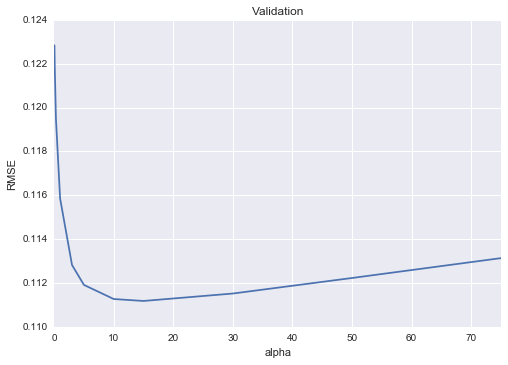

The optimal value for alpha is 15
The baseline for RMSE is 0.111178716334


In [32]:
"""Checkpoint Model to Compare To (used as RidgeCV has shown to have top output for us)"""

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
rmse = []

for alpha in alphas:
    rmse.append(np.sqrt(-cross_val_score(Ridge(alpha = alpha), X_train, Y_train, scoring="mean_squared_error", cv = 5)).mean())

rmse_values = pd.Series(rmse, index = alphas)
rmse_values.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

min_y = min(rmse)
max_x = alphas[rmse.index(min_y)]
print "The optimal value for alpha is " + str(max_x)
print "The baseline for RMSE is " + str(min_y)

In [33]:
"""Cell to see if should split model into neighborhoods and model each cluster separately for more accuracy."""

neighborhood_price_groups = list(set(train_neighborhood_array))

RMSE_list = []
for neighborhood_group in neighborhood_price_groups:        
    neighborhood_group_X_train = train_data[train_neighborhood_array==neighborhood_group]
    neighborhood_group_Y_train = Y_train[train_neighborhood_array==neighborhood_group]
    
    alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
    rmse = []

    for alpha in alphas:
        rmse.append(np.sqrt(-cross_val_score(Ridge(alpha = alpha), neighborhood_group_X_train,
                                             neighborhood_group_Y_train, scoring="mean_squared_error", cv = 5)).mean())

    min_y = min(rmse)
    max_x = alphas[rmse.index(min_y)]

    #append key information about each cluster to a list, including #labels and RMSE so can later compute weighted RMSE
    RMSE_list.append((neighborhood_group, np.sum(train_neighborhood_array==neighborhood_group), min_y, max_x))
    print "Neighborhood Price Group:",neighborhood_group,
    print "Number of Instances:",np.sum(train_neighborhood_array==neighborhood_group),
    print "RMSE: ", "{0:1f}".format(min_y)

#compute weighted RMSE of neighborhood-specific models
RMSE_total = 0
for pairing in RMSE_list :
    RMSE_total += pairing[1]*pairing[2]
RMSE_total= RMSE_total / train_data.shape[0]
   
print "Weighted RMSEs of Neighborhood Grouping models:", "{0:1f}".format(RMSE_total)

#conclusion: no benefit to splitting out main dataset by neighborhood grouping and creating neighborhood-specific models
print "--> No benefit to breaking out training data by neightborhood grouping models. Best RMSE is still with single cluster."


Neighborhood Price Group: Lo Number of Instances: 223 RMSE:  0.148322
Neighborhood Price Group: Hi Number of Instances: 591 RMSE:  0.094004
Neighborhood Price Group: VHi Number of Instances: 141 RMSE:  0.139406
Neighborhood Price Group: Mid Number of Instances: 273 RMSE:  0.096492
Neighborhood Price Group: VLo Number of Instances: 226 RMSE:  0.157368
Weighted RMSEs of Neighborhood Grouping models: 0.117054
--> No benefit to breaking out training data by neightborhood grouping models. Best RMSE is still with single cluster.


In [34]:
"""Cell to see if should split model into K-means and model each cluster separately for more accuracy."""

from sklearn.cluster import KMeans

k_means_for_tryout = [1,2,3,4,5,7,10]

for k_means in k_means_for_tryout :
    #reset matrix back to original PCA training data matrix at start of each for loop
    clusters_matrix = train_data.copy(deep=True)

    #run kmeans model for this number of clusters
    kmeans_model = KMeans(n_clusters=k_means).fit(train_data)
    kmeans_centers = kmeans_model.cluster_centers_
    kmeans_labels = kmeans_model.labels_
    kmeans_distances = kmeans_model.transform(train_data)  #returns matrix with distances to EACH centroid

    #set up list of labels to iterate through.
    labels = range(0,k_means)

    RMSE_list = []

    #We will run a Ridge model on each subset of labels and compute RMSE on each cluster label, 
    #then weight the RMSEs calc'd per cluster
    for label in labels: 
        
        #take just cluster subset to model
        K_means_X_train = train_data[kmeans_labels==label]
        K_means_Y_train = Y_train[kmeans_labels==label]

        alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
        rmse = []

        for alpha in alphas:
            rmse.append(np.sqrt(-cross_val_score(Ridge(alpha = alpha), K_means_X_train,
                                                 K_means_Y_train, scoring="mean_squared_error", cv = 5)).mean())

        min_y = min(rmse)
        max_x = alphas[rmse.index(min_y)]

        #append key information about each cluster to a list, including #labels and RMSE so can later compute weighted RMSE
        RMSE_list.append((label, np.sum(kmeans_labels==label), min_y, max_x))

    #compute weighted RMSE of cluster-specific models
    RMSE_total = 0
    for pairing in RMSE_list :
        RMSE_total += pairing[1]*pairing[2]
    RMSE_total= RMSE_total / train_data.shape[0]

    print "K-Means Clusters:", k_means, "    Weighted RMSEs of Cluster-Specific Models:", "{0:3f}".format(RMSE_total)

#conclusion: no benefit to splitting out main dataset by cluster and creating cluster-specific models
print "--> No benefit to breaking out training data by cluster. Best RMSE is still with single cluster."

K-Means Clusters: 1     Weighted RMSEs of Cluster-Specific Models: 0.111179
K-Means Clusters: 2     Weighted RMSEs of Cluster-Specific Models: 0.113012
K-Means Clusters: 3     Weighted RMSEs of Cluster-Specific Models: 0.113558
K-Means Clusters: 4     Weighted RMSEs of Cluster-Specific Models: 0.116119
K-Means Clusters: 5     Weighted RMSEs of Cluster-Specific Models: 0.118157
K-Means Clusters: 7     Weighted RMSEs of Cluster-Specific Models: 0.122005
K-Means Clusters: 10     Weighted RMSEs of Cluster-Specific Models: 0.129109
--> No benefit to breaking out training data by cluster. Best RMSE is still with single cluster.


#### NOTE: In each of the following charts, double-click the chart itseld to see expanded and more readable view.
We used these to get a sense of significance of features for each kind of model. We then tried removing features that seemed unimportant, but sometimes saw materially worse RMSEs upon removal. Ultimately, we kept all the features.

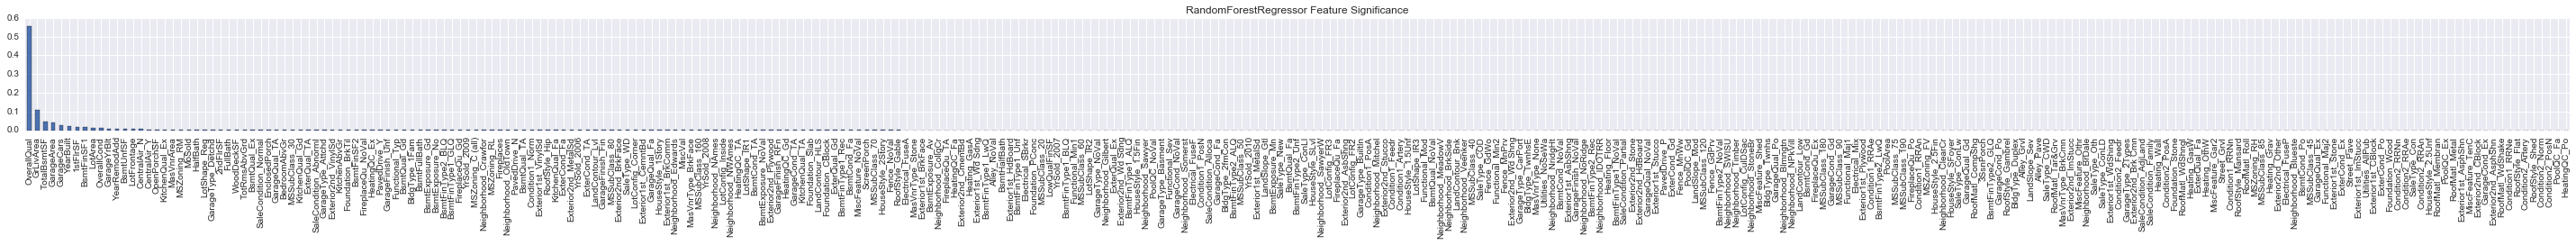

In [35]:
# Basic RandomForestRegressor Feature Selection
import matplotlib.pyplot as rfr_plt
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

rfr_plt.figure(figsize=(40, 2.5))
rfr_plt.title('RandomForestRegressor Feature Significance')
rfr_plt.tight_layout()

rfr_coef = pd.Series(rfr.feature_importances_, 
                    index = X_train.columns
                   ).sort_values(ascending=False)
rfr_coef.plot(kind='bar')

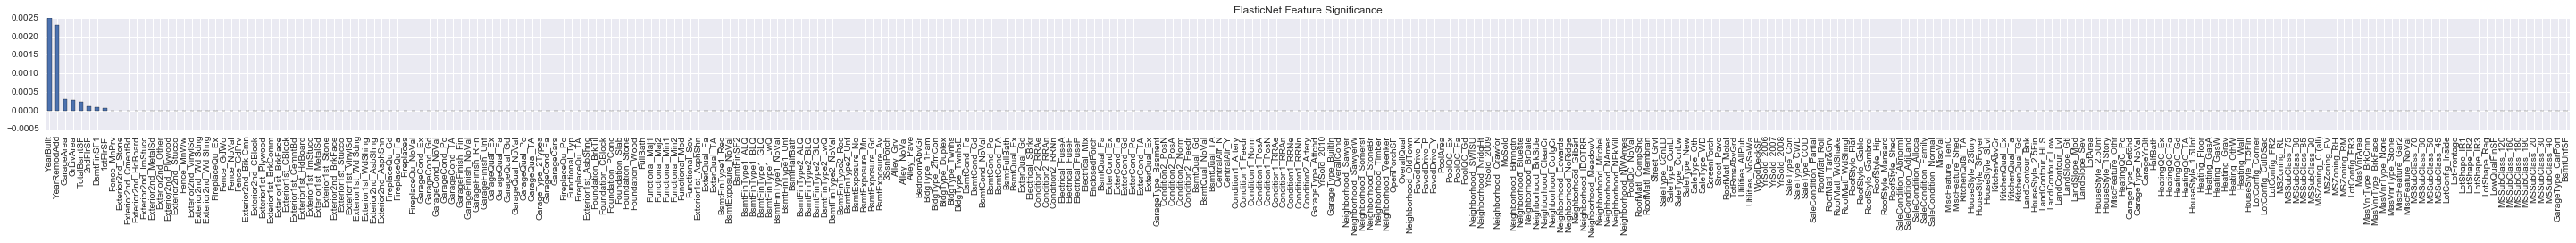

In [36]:
# Basic ElasticNet Feature Selection
import matplotlib.pyplot as eln_plt
from sklearn.linear_model import ElasticNet

eln = ElasticNet()
eln.fit(X_train, Y_train)

eln_plt.figure(figsize=(40, 2.5))
eln_plt.title('ElasticNet Feature Significance')
eln_plt.tight_layout()

eln_coef = pd.Series(eln.coef_,
                    index = X_train.columns
                   ).sort_values(ascending=False)
eln_coef.plot(kind='bar')

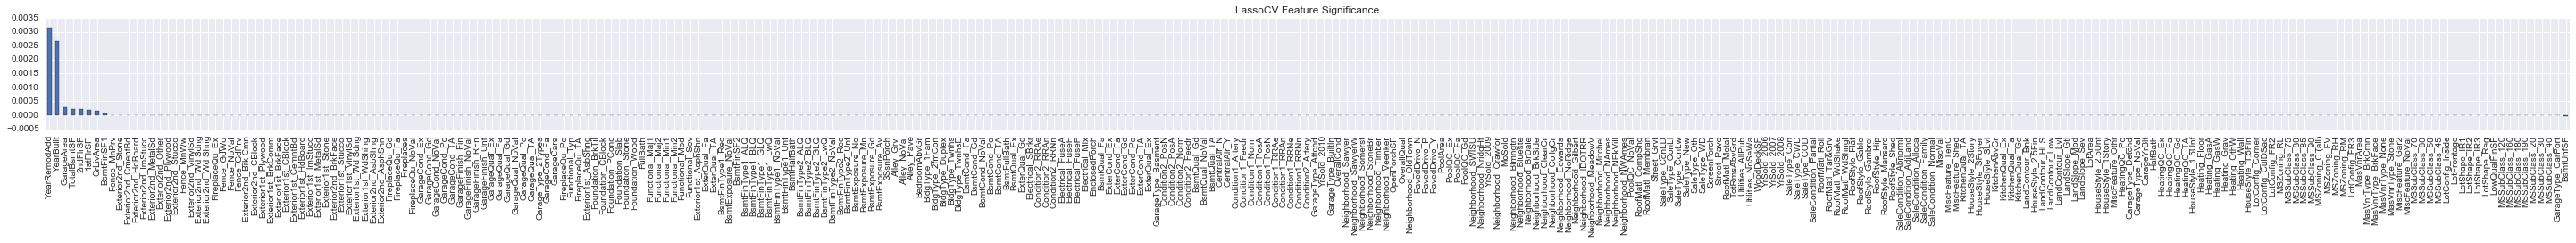

In [37]:
# Basic LassoCV Feature Selection
import matplotlib.pyplot as lascv_plt
from sklearn.linear_model import LassoCV

lascv = LassoCV()
lascv.fit(X_train, Y_train)

lascv_plt.figure(figsize=(40, 2.5))
lascv_plt.title('LassoCV Feature Significance')
lascv_plt.tight_layout()

lascv_coef = pd.Series(lascv.coef_,
                       index = X_train.columns
                      ).sort_values(ascending=False)
lascv_coef.plot(kind='bar')

C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=4.589e-04, with an active set of 34 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 57 iterations, i.e. alpha=2.781e-04, with an active set of 57 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 57 iterations, i.e. alpha=2.781e-04, with an active set of 57 regressors, and the smallest cholesky pivot element bei

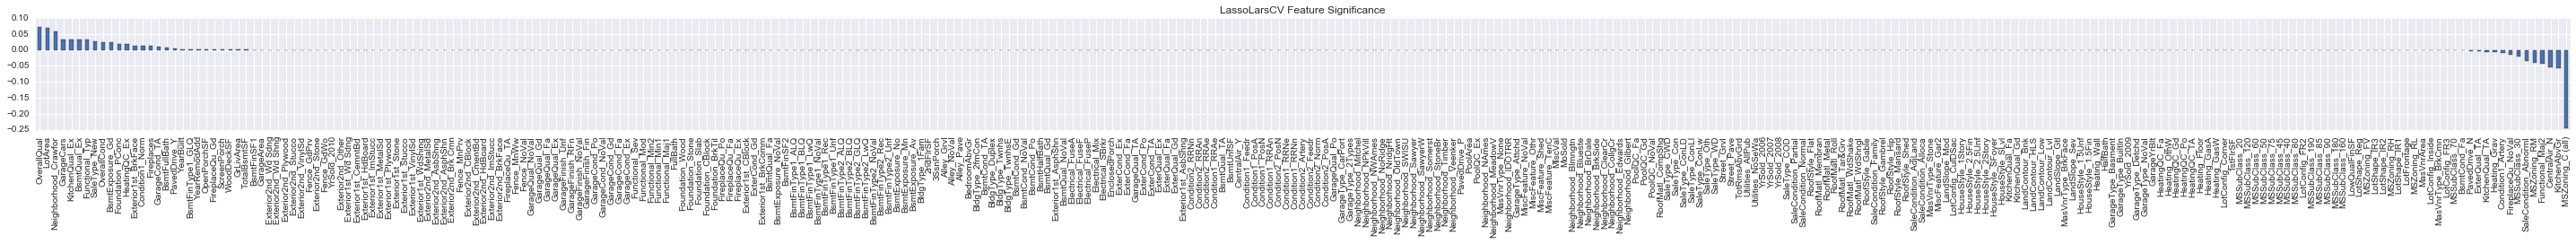

In [38]:
# Basic LassoLarCV Feature Selection
import matplotlib.pyplot as laslarcv_plt
from sklearn.linear_model import LassoLarsCV

laslarcv = LassoLarsCV()
laslarcv.fit(X_train, Y_train)

laslarcv_plt.figure(figsize=(40, 2.5))
laslarcv_plt.title('LassoLarsCV Feature Significance')
laslarcv_plt.tight_layout()

laslarcv_coef = pd.Series(laslarcv.coef_,
                          index = X_train.columns
                         ).sort_values(ascending=False)
laslarcv_coef.plot(kind='bar')

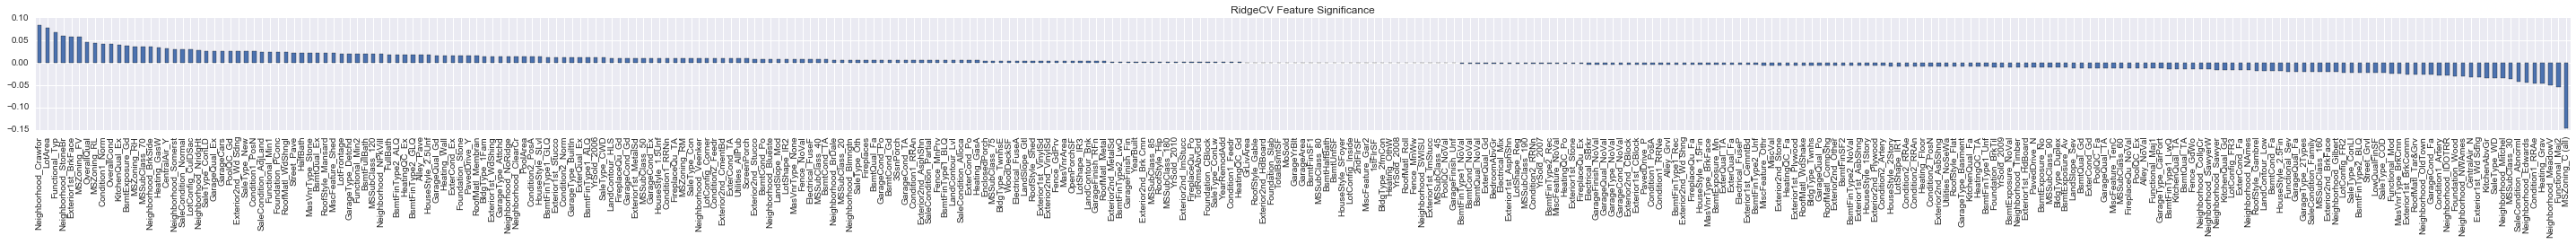

In [39]:
# Basic RidgeCV Feature Selection
import matplotlib.pyplot as rdecv_plt
from sklearn.linear_model import RidgeCV

rdecv = RidgeCV()
rdecv.fit(X_train, Y_train)

rdecv_plt.figure(figsize=(40, 2.5))
rdecv_plt.title('RidgeCV Feature Significance')
rdecv_plt.tight_layout()

rdecv_coef = pd.Series(rdecv.coef_,
                       index = X_train.columns
                       ).sort_values(ascending=False)
rdecv_coef.plot(kind='bar')

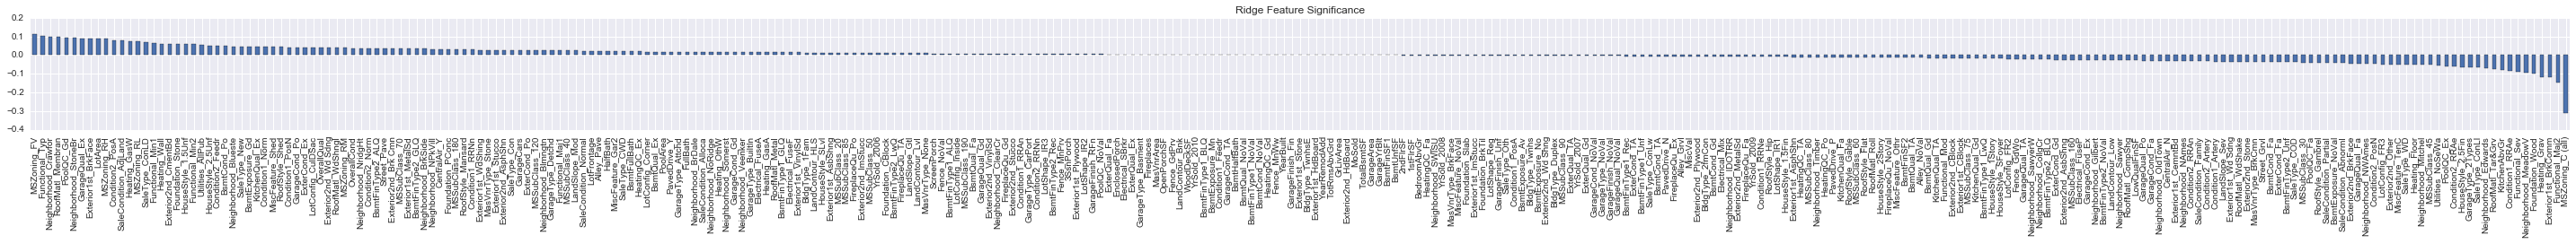

In [40]:
# Basic Ridge Feature Selection
import matplotlib.pyplot as rde_plt
from sklearn.linear_model import Ridge

rde = Ridge()
rde.fit(X_train, Y_train)

rde_plt.figure(figsize=(40, 2.5))
rde_plt.title('Ridge Feature Significance')
rde_plt.tight_layout()

rde_coef = pd.Series(rde.coef_,
                     index = X_train.columns
                     ).sort_values(ascending=False)
rde_coef.plot(kind='bar')

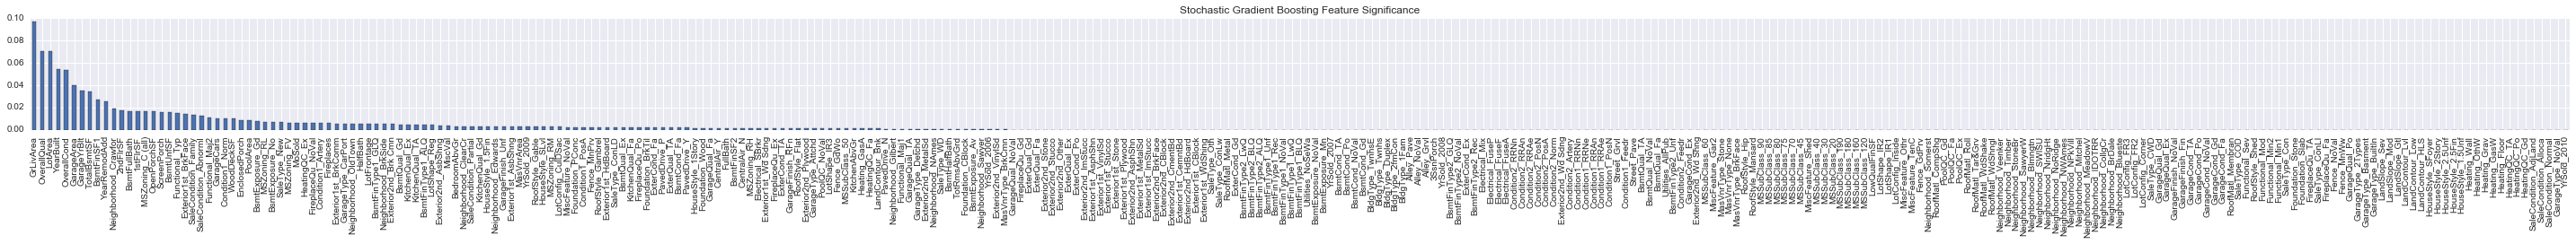

In [41]:
# Basic Stochastic Gradient Boosting Feature Significance
import matplotlib.pyplot as GBR_plt
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(X_train, Y_train)

GBR_plt.figure(figsize=(40, 2.5))
GBR_plt.title('Stochastic Gradient Boosting Feature Significance')
GBR_plt.tight_layout()

GBR_coefs = pd.Series(GBR.feature_importances_,
                      index = X_train.columns
                      ).sort_values(ascending=False)
GBR_coefs.plot(kind='bar')

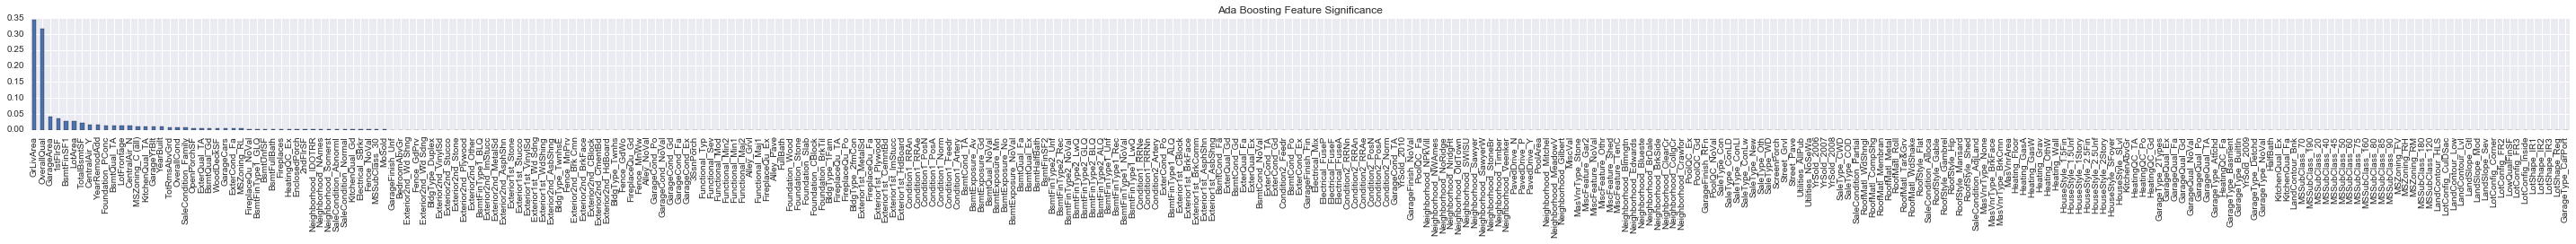

In [42]:
# Basic Ada Boosting Feature Significance
import matplotlib.pyplot as ADA_plt
from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor()
ADA.fit(X_train, Y_train)

ADA_plt.figure(figsize=(40, 2.5))
ADA_plt.title('Ada Boosting Feature Significance')
ADA_plt.tight_layout()

ADA_coefs = pd.Series(ADA.feature_importances_,
                      index = X_train.columns
                      ).sort_values(ascending=False)
ADA_coefs.plot(kind='bar')

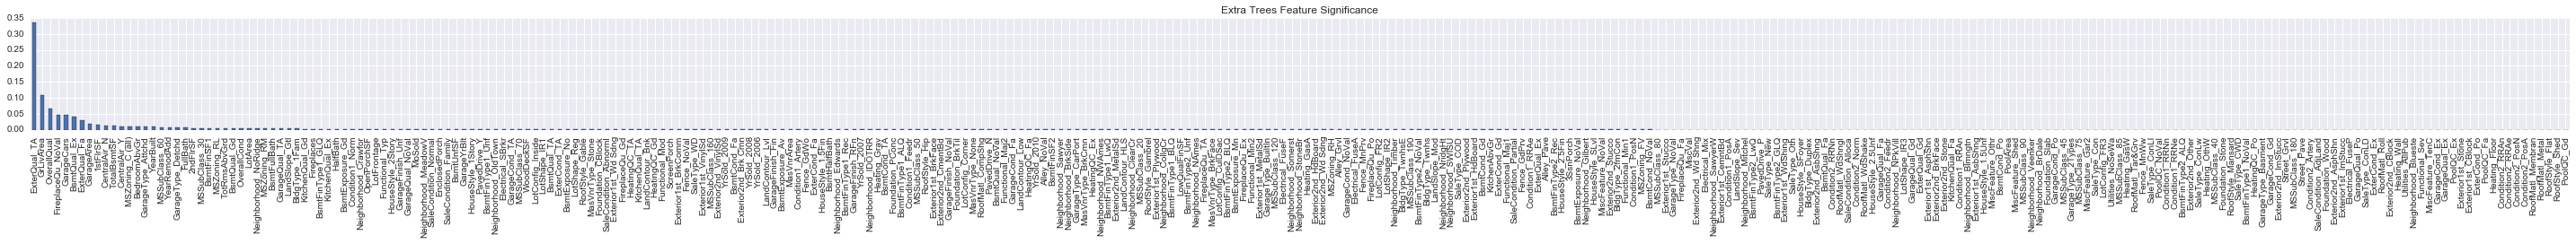

In [43]:
# Basic Extra Trees Feature Significance
import matplotlib.pyplot as ET_plt
from sklearn.ensemble import ExtraTreesRegressor

ET = ExtraTreesRegressor()
ET.fit(X_train, Y_train)

ET_plt.figure(figsize=(40, 2.5))
ET_plt.title('Extra Trees Feature Significance')
ET_plt.tight_layout()

ET_coefs = pd.Series(ET.feature_importances_,
                      index = X_train.columns
                      ).sort_values(ascending=False)
ET_coefs.plot(kind='bar')

C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


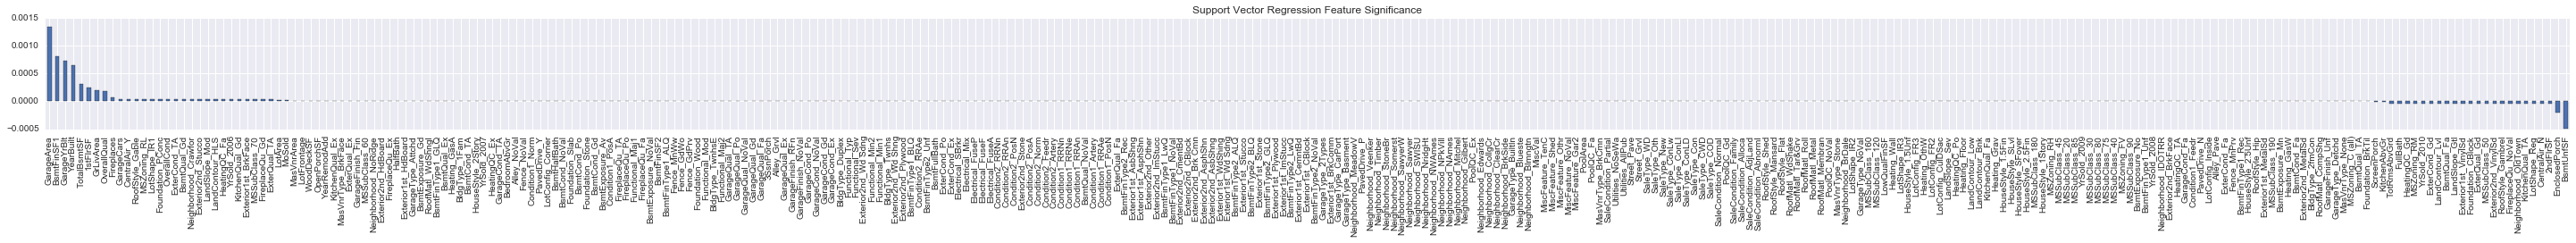

In [44]:
# Basic Support Vector Regression
import matplotlib.pyplot as SVR_plt
from sklearn.svm import SVR

SVR = SVR(kernel='linear', max_iter=3)
SVR.fit(X_train, Y_train)

SVR_plt.figure(figsize=(40, 2.5))
SVR_plt.title('Support Vector Regression Feature Significance')
SVR_plt.tight_layout()

SVR_coefs = pd.Series(SVR.coef_[0],
                      index = X_train.columns
                      ).sort_values(ascending=False)
SVR_coefs.plot(kind='bar')

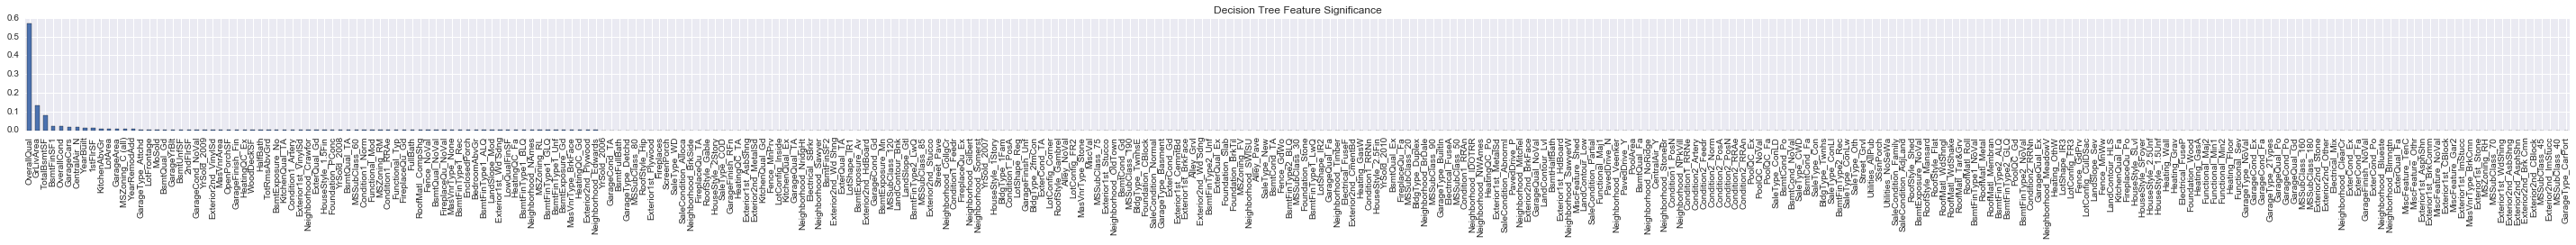

In [45]:
# Basic Decision Tree Regressor
import matplotlib.pyplot as DT_plt
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)

DT_plt.figure(figsize=(40, 2.5))
DT_plt.title('Decision Tree Feature Significance')
DT_plt.tight_layout()

DT_coefs = pd.Series(DT.feature_importances_,
                      index = X_train.columns
                      ).sort_values(ascending=False)
DT_coefs.plot(kind='bar')

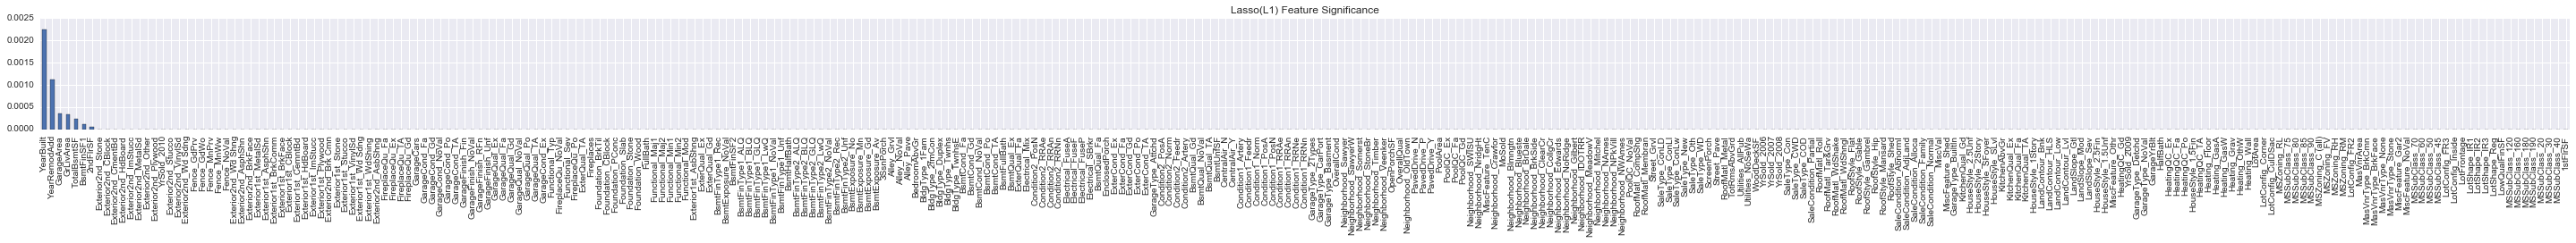

In [46]:
# Basic Lasso Regression l_1(Lasso)
import matplotlib.pyplot as lasso_plt
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, Y_train)

lasso_plt.figure(figsize=(40, 2.5))
lasso_plt.title('Lasso(L1) Feature Significance')
lasso_plt.tight_layout()

lasso_coefs = pd.Series(lasso.coef_,
                      index = X_train.columns
                      ).sort_values(ascending=False)
lasso_coefs.plot(kind='bar')

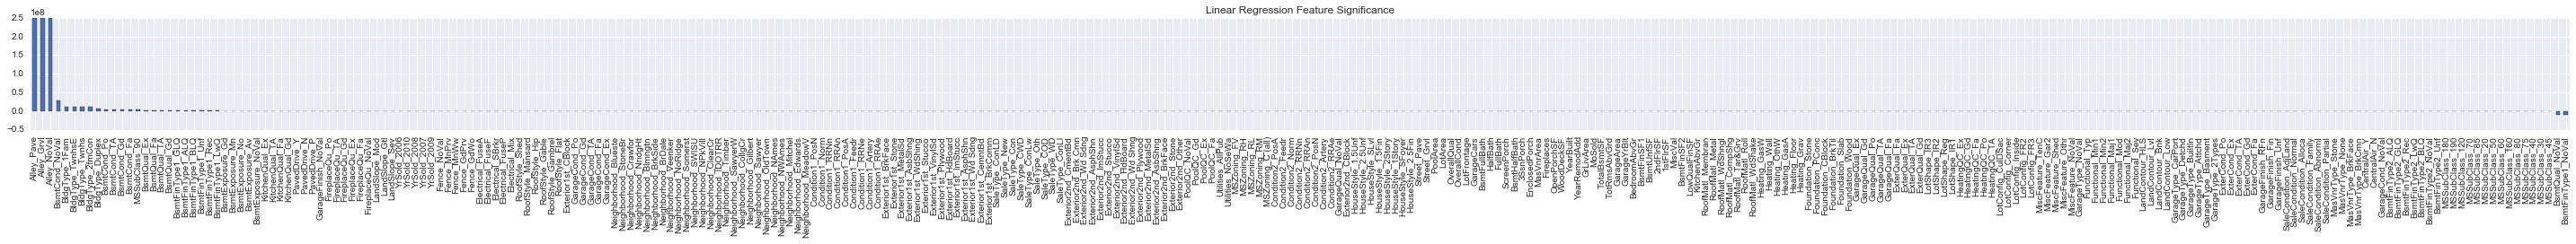

In [47]:
# Basic Linear Regression Feature Selection
import matplotlib.pyplot as lr_plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

lr_plt.figure(figsize=(40, 2.5))
lr_plt.title('Linear Regression Feature Significance')
lr_plt.tight_layout()

lr_coef = pd.Series(lr.coef_,
                         index = X_train.columns
                         ).sort_values(ascending=False)
lr_coef.plot(kind='bar')

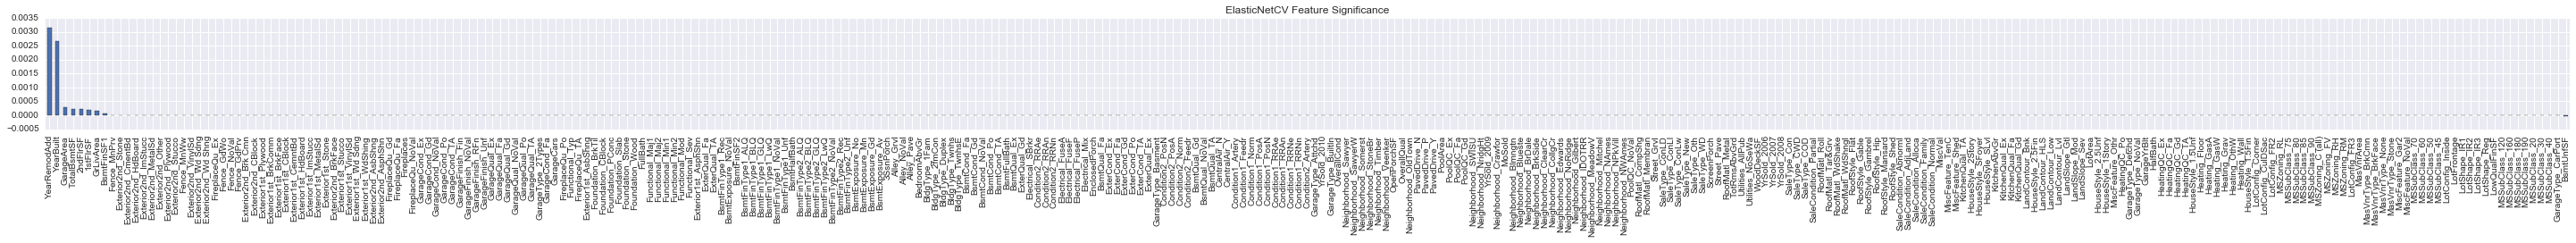

In [48]:
# Basic ElasticNetCV Feature Selection
import matplotlib.pyplot as elcv_plt
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV()
elasticcv.fit(X_train, Y_train)

elcv_plt.figure(figsize=(40, 2.5))
elcv_plt.title('ElasticNetCV Feature Significance')
elcv_plt.tight_layout()

elcv_coef = pd.Series(elasticcv.coef_,
                    index = X_train.columns
                   ).sort_values(ascending=False)
elcv_coef.plot(kind='bar')

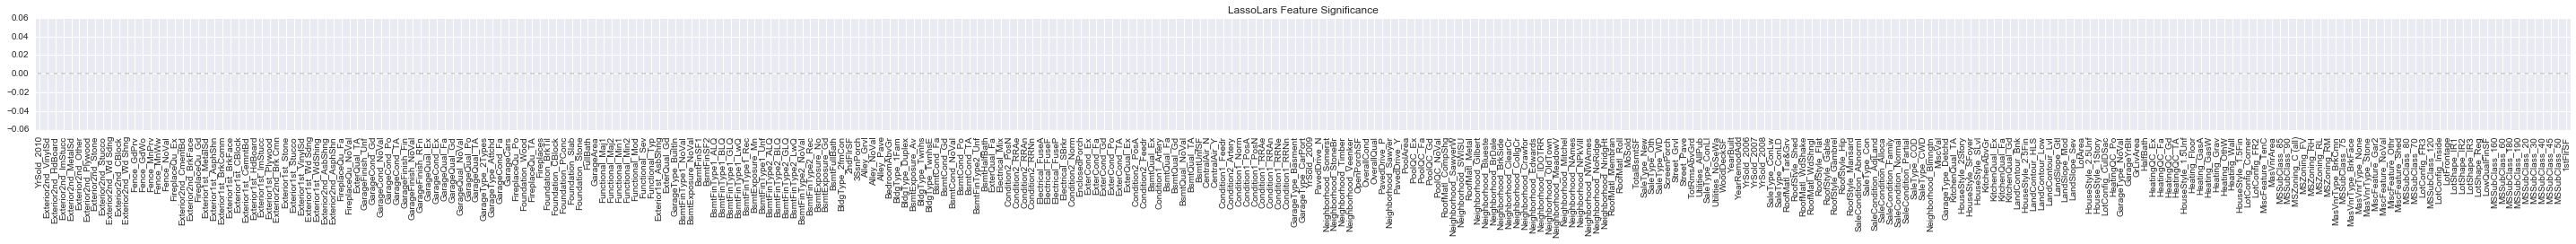

In [49]:
# Basic LassoLars Feature Selection
import matplotlib.pyplot as laslars_plt
from sklearn.linear_model import LassoLars

laslars = LassoLars()
laslars.fit(X_train, Y_train)

laslars_plt.figure(figsize=(40, 2.5))
laslars_plt.title('LassoLars Feature Significance')
laslars_plt.tight_layout()

laslars_coef = pd.Series(laslars.coef_,
                          index = X_train.columns
                       ).sort_values(ascending=False)
laslars_coef.plot(kind='bar')

C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=1.209e-03, with an active set of 11 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=6.362e-04, with an active set of 21 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 32 iterations, i.e. alpha=4.287e-04, with an active set of 32 regressors, and the smallest cholesky pivot element bei

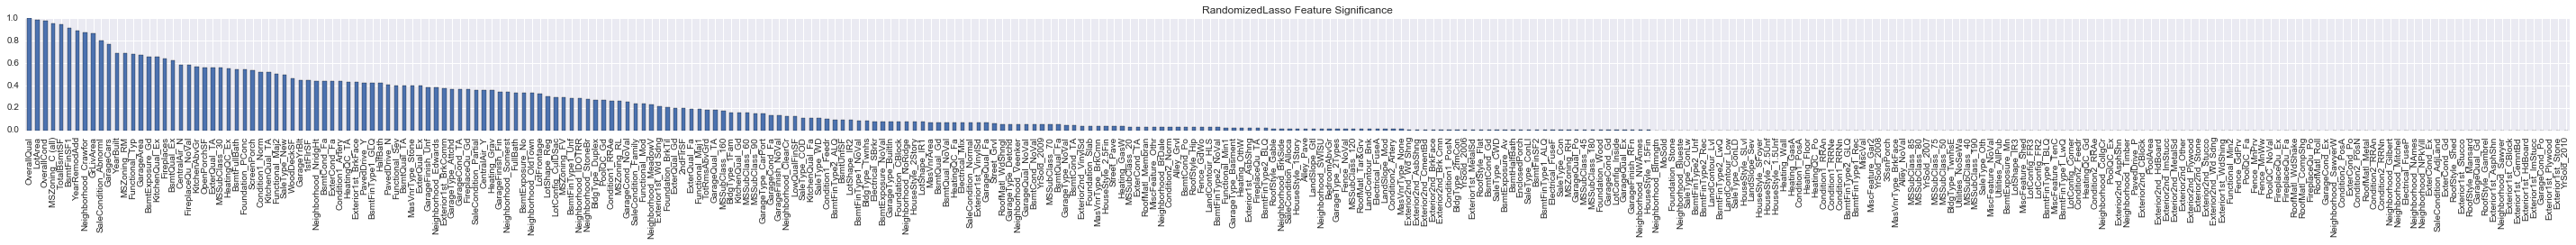

In [50]:
# Basic RandomizedLasso Feature Selection
import matplotlib.pyplot as rlasso_plt
from sklearn.linear_model import RandomizedLasso

rlasso = RandomizedLasso()
rlasso.fit(X_train, Y_train)

rlasso_plt.figure(figsize=(40, 2.5))
rlasso_plt.title('RandomizedLasso Feature Significance')
rlasso_plt.tight_layout()

rlasso_coef = pd.Series(rlasso.scores_,
                          index = X_train.columns
                       ).sort_values(ascending=False)
rlasso_coef.plot(kind='bar')

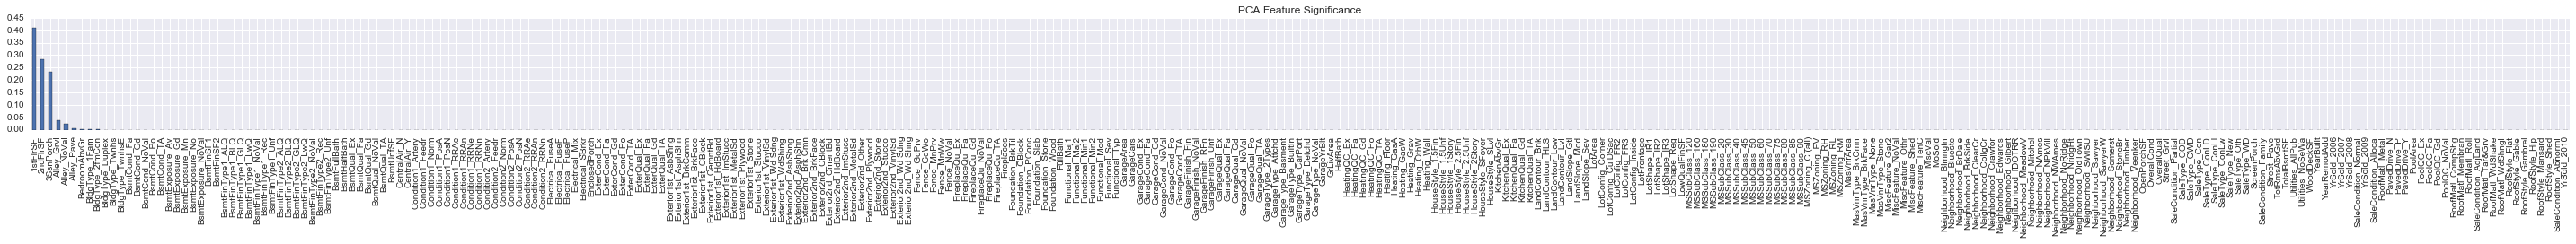

In [51]:
# Basic PCA Feature Selection
#
# Recall from Project 3 that PCA is to be used for feature selection inconjunction with GMM, they go hand-in-hand!
#
import matplotlib.pyplot as pca_plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

pca_plt.figure(figsize=(40, 2.5))
pca_plt.title('PCA Feature Significance')
pca_plt.tight_layout()

pca_coef = pd.Series(pca.explained_variance_ratio_,
                      index = X_train.columns
                      ).sort_values(ascending=False)
pca_coef.plot(kind='bar')

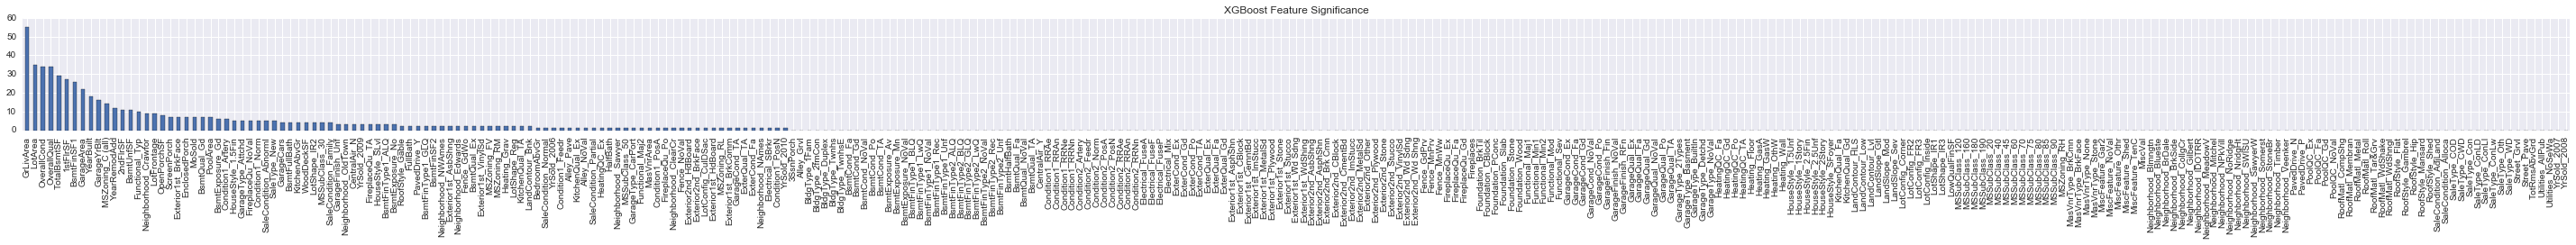

In [52]:
# Basic XGBoost Feature Selection
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

import matplotlib.pyplot as xgb_plt
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

xgb_plt.figure(figsize=(40, 2.5))
xgb_plt.title('XGBoost Feature Significance')
xgb_plt.tight_layout()

xgb_coef = pd.Series(xgb.booster().get_fscore(),
                     index = X_train.columns
                     ).sort_values(ascending=False)
xgb_coef.plot(kind='bar')

## MODELING AND PERFORMANCE EVALUATION

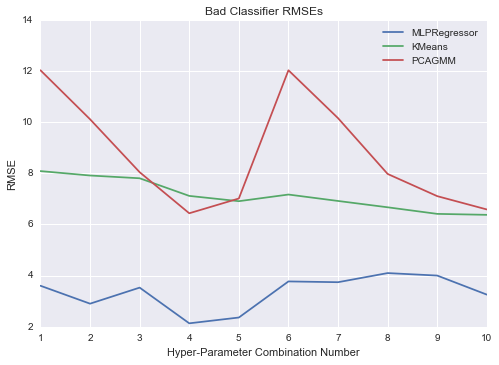

In [53]:
"""These were the classifiers that showed poor results. We did not try tuning these further."""

# Bad Classifier RMSEs

# Get some cross validaton on!
from sklearn.cross_validation import cross_val_score

# Because Hyperparameter combinations are unique across classifiers, for plotting we limit ourselves to 10 combinations
hypparms_combo_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

########################################## MLPRegressor! ##########################################################
from sklearn.neural_network import MLPRegressor
MLP_lays = [100, 200, 300, 400, 500, 100, 100, 100, 100, 100]
MLP_rmse = []
for MLP_lay in MLP_lays:
    MLP_rmse.append(np.sqrt(-cross_val_score(MLPRegressor(hidden_layer_sizes=(MLP_lay, ), tol=0.01), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
MLP_rmse_values = pd.Series(MLP_rmse, 
                            index=hypparms_combo_num,
                            name='MLPRegressor')

########################################## KMeans! #################################################################
from sklearn.cluster import KMeans
KM_ncluts = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
KM_rmse = []
for KM_nclut in KM_ncluts:
    KM_rmse.append(np.sqrt(-cross_val_score(KMeans(n_clusters=KM_nclut), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
KM_rmse_values = pd.Series(KM_rmse, 
                           index=hypparms_combo_num,
                           name='KMeans')

########################################## PCA and GMM! ###########################################################
from sklearn.decomposition import PCA
from sklearn import mixture
PCA_comps = [5, 10]
GMM_comps = [1, 5, 10, 20, 25]
PCAGMM_rmse = []
for PCA_comp in PCA_comps:
    pca = PCA(n_components=PCA_comp)
    pca_train = pca.fit_transform(X_train)
    for GMM_comp in GMM_comps:
        PCAGMM_rmse.append(np.sqrt(-cross_val_score(mixture.GaussianMixture(n_components=GMM_comp, covariance_type='full'), pca.transform(X_train), Y_train, scoring="mean_squared_error", cv=5)).mean())
PCAGMM_rmse_values = pd.Series(PCAGMM_rmse, 
                                index=hypparms_combo_num,
                                name='PCAGMM')

########################################## Concatentate! ##########################################
plot_rmse_combinations = pd.concat([
                                    MLP_rmse_values
                                   ,KM_rmse_values
                                   ,PCAGMM_rmse_values
                                   ], join='outer', axis = 1)

########################################## Plot! ##########################################
plot_rmse_combinations.plot(title="Bad Classifier RMSEs")
plt.xlabel("Hyper-Parameter Combination Number")
plt.ylabel("RMSE")

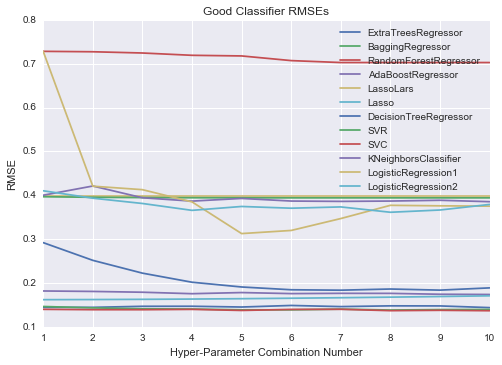

In [54]:
"""These were the classifiers that showed good results. We tried some extra tuning, but ultimately did not use for
Kaggle submissions."""

# Good Classifier RMSEs

# Get some cross validaton on!
from sklearn.cross_validation import cross_val_score

# Because Hyperparameter combinations are unique across classifiers, for plotting we limit ourselves to 10 combinations
hypparms_combo_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

########################################## ExtraTreesRegressor! ##########################################
from sklearn.ensemble import ExtraTreesRegressor
ETR_nests = [10, 20, 20, 10, 10, 10, 10, 10, 10, 10]
ETR_rmse = []
for ETR_nest in ETR_nests:
    ETR_rmse.append(np.sqrt(-cross_val_score(ExtraTreesRegressor(max_depth=ETR_nest), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
ETR_rmse_values = pd.Series(ETR_rmse, 
                            index=hypparms_combo_num,
                            name='ExtraTreesRegressor')

########################################## BaggingRegressor! ##########################################
from sklearn.ensemble import BaggingRegressor
BGR_nests = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
BGR_rmse = []
for BGR_nest in BGR_nests:
    BGR_rmse.append(np.sqrt(-cross_val_score(BaggingRegressor(n_estimators=BGR_nest), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
BGR_rmse_values = pd.Series(BGR_rmse, 
                            index=hypparms_combo_num,
                            name='BaggingRegressor')

########################################## RandomForestRegressor! ##########################################
from sklearn.ensemble import RandomForestRegressor
RFR_nests = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
RFR_rmse = []
for RFR_nest in RFR_nests:
    RFR_rmse.append(np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=RFR_nest), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
RFR_rmse_values = pd.Series(RFR_rmse, 
                            index=hypparms_combo_num,
                            name='RandomForestRegressor')

########################################## AdaBoostRegressor! ##########################################
from sklearn.ensemble import AdaBoostRegressor
ADA_nests = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
ADA_rmse = []
for ADA_nest in ADA_nests:
    ADA_rmse.append(np.sqrt(-cross_val_score(AdaBoostRegressor(n_estimators=ADA_nest), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
ADA_rmse_values = pd.Series(ADA_rmse, 
                            index=hypparms_combo_num,
                            name='AdaBoostRegressor')

########################################## LassoLars! ##########################################
#from sklearn.linear_model import LassoLarsCV # LassoLars linear model with iterative fitting along a regularization path
from sklearn.linear_model import LassoLars
LLAR_alphas = [0.9, 0.8, 0.7, 0.6, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
LLAR_rmse = []
for LLAR_alpha in LLAR_alphas:
    LLAR_rmse.append(np.sqrt(-cross_val_score(LassoLars(alpha=LLAR_alpha), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
LLAR_rmse_values = pd.Series(LLAR_rmse, 
                            index=hypparms_combo_num,
                            name='LassoLars')

########################################## Lasso! ##########################################
#from sklearn.linear_model import LassoCV # Lasso linear model with iterative fitting along a regularization path
from sklearn.linear_model import Lasso
LASS_alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
LASS_rmse = []
for LASS_alpha in LASS_alphas:
    LASS_rmse.append(np.sqrt(-cross_val_score(Lasso(alpha=LASS_alpha), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
LASS_rmse_values = pd.Series(LASS_rmse, 
                            index=hypparms_combo_num,
                            name='Lasso')

########################################## DecisionTreeRegressor! ##########################################
from sklearn.tree import DecisionTreeRegressor
DTR_maxds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
DTR_rmse = []
for DTR_maxd in DTR_maxds:
    DTR_rmse.append(np.sqrt(-cross_val_score(DecisionTreeRegressor(max_depth=DTR_maxd), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
DTR_rmse_values = pd.Series(DTR_rmse, 
                            index=hypparms_combo_num,
                            name='DecisionTreeRegressor')

########################################## Support Vector Regression! ##########################################
from sklearn.svm import SVR
SVR_pens = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 10.0, 100.0, 1000.0, 10000.0]
SVR_rmse = []
for SVR_pen in SVR_pens:
    SVR_rmse.append(np.sqrt(-cross_val_score(SVR(C=SVR_pen), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
SVR_rmse_values = pd.Series(SVR_rmse, 
                            index=hypparms_combo_num,
                            name='SVR')

########################################## Support Vector Classification! ##########################################
from sklearn.svm import SVC
SVC_pens = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 10.0, 100.0, 1000.0, 10000.0]
SVC_rmse = []
for SVC_pen in SVC_pens:
    SVC_rmse.append(np.sqrt(-cross_val_score(SVC(C=SVC_pen), X_train, Y_train.astype(int), scoring="mean_squared_error", cv=5)).mean())
SVC_rmse_values = pd.Series(SVC_rmse, 
                            index=hypparms_combo_num,
                            name='SVC')

########################################## KNeighborsClassifier! ##########################################
from sklearn.neighbors import KNeighborsClassifier
KNN_nneighs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
KNN_rmse = []
for KNN_nneigh in KNN_nneighs:
    KNN_rmse.append(np.sqrt(-cross_val_score(KNeighborsClassifier(n_neighbors=KNN_nneigh), X_train, Y_train.astype(int), scoring="mean_squared_error", cv=5)).mean())
KNN_rmse_values = pd.Series(KNN_rmse, 
                            index=hypparms_combo_num,
                            name='KNeighborsClassifier')

########################################## L1 LogisticRegression! ##########################################
from sklearn.linear_model import LogisticRegression
LR1_regs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
LR1_rmse = []
for LR1_reg in LR1_regs:
    LR1_rmse.append(np.sqrt(-cross_val_score(LogisticRegression(C=LR1_reg, penalty='l1', tol=0.01), X_train, Y_train.astype(int), scoring="mean_squared_error", cv=5)).mean())
LR1_rmse_values = pd.Series(LR1_rmse, 
                            index=hypparms_combo_num,
                            name='LogisticRegression1')

########################################## L2 LogisticRegression! ##########################################
from sklearn.linear_model import LogisticRegression
LR2_regs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
LR2_rmse = []
for LR2_reg in LR2_regs:
    LR2_rmse.append(np.sqrt(-cross_val_score(LogisticRegression(C=LR2_reg, penalty='l2', tol=0.01), X_train, Y_train.astype(int), scoring="mean_squared_error", cv=5)).mean())
LR2_rmse_values = pd.Series(LR2_rmse, 
                            index=hypparms_combo_num,
                            name='LogisticRegression2')

########################################## Concatentate! ##########################################
plot_rmse_combinations = pd.concat([
                                    ETR_rmse_values
                                   ,BGR_rmse_values
                                   ,RFR_rmse_values
                                   ,ADA_rmse_values
                                   ,LLAR_rmse_values
                                   ,LASS_rmse_values
                                   ,DTR_rmse_values
                                   ,SVR_rmse_values
                                   ,SVC_rmse_values
                                   ,KNN_rmse_values
                                   ,LR1_rmse_values
                                   ,LR2_rmse_values
                                   ], join='outer', axis = 1)

########################################## Plot! ##########################################
plot_rmse_combinations.plot(title="Good Classifier RMSEs")
plt.xlabel("Hyper-Parameter Combination Number")
plt.ylabel("RMSE")

C:\Users\kowen\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


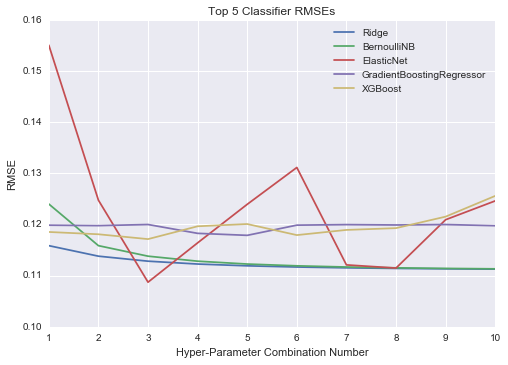

In [55]:
"""These were the classifiers with the best results. We tried tuning these significantly with various hyperparameters,
and used multiple of these in submissions through Kaggle."""

# Top 5 Classifier RMSEs

# Get some cross validaton on!
from sklearn.cross_validation import cross_val_score

# Because Hyperparameter combinations are unique across classifiers, for plotting we limit ourselves to 10 combinations
hypparms_combo_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

########################################## Ridge! ##########################################
# from sklearn.linear_model import RidgeCV # Ridge regression with built-in cross-validation.
from sklearn.linear_model import Ridge
Ridge_alphas = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Ridge_rmse = []
for Ridge_alpha in Ridge_alphas:
    Ridge_rmse.append(np.sqrt(-cross_val_score(Ridge(alpha=Ridge_alpha), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
Ridge_rmse_values = pd.Series(Ridge_rmse, 
                              index=hypparms_combo_num,
                              name='Ridge')

########################################## BernoulliNB! ##########################################
from sklearn.naive_bayes import BernoulliNB
BNB_alphas = [0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
BNB_rmse = []
for BNB_alpha in BNB_alphas:
    BNB_rmse.append(np.sqrt(-cross_val_score(Ridge(alpha=BNB_alpha), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
BNB_rmse_values = pd.Series(BNB_rmse, 
                            index=hypparms_combo_num,
                            name='BernoulliNB')

########################################## ElasticNet! ##########################################
# from sklearn.linear_model import ElasticNetCV # Elastic Net model with iterative fitting along a regularization path
from sklearn.linear_model import ElasticNet
ElasticNet_l1rats = [0.5, 0.1]
ElasticNet_alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001]
ElasticNet_rmse = []
for ElasticNet_l1rat in ElasticNet_l1rats:
    for ElasticNet_alpha in ElasticNet_alphas:
        ElasticNet_rmse.append(np.sqrt(-cross_val_score(ElasticNet(alpha=ElasticNet_alpha, l1_ratio=ElasticNet_l1rat), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
ElasticNet_rmse_values = pd.Series(ElasticNet_rmse, 
                                   index=hypparms_combo_num,
                                   name='ElasticNet')

##################################### GradientBoostingRegressor! ###################################################
from sklearn.ensemble import GradientBoostingRegressor
GBR_ests = [100, 100, 100, 1000, 1000, 100, 100, 100, 100, 100]
GBR_rmse = []
for GBR_est in GBR_ests:
    GBR_rmse.append(np.sqrt(-cross_val_score(GradientBoostingRegressor(n_estimators=GBR_est), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
GBR_rmse_values = pd.Series(GBR_rmse, 
                            index=hypparms_combo_num,
                            name='GradientBoostingRegressor')

########################################## XGBoost! ###############################################################
from xgboost import XGBRegressor
XGBoost_lrs = [0.1, 0.2]
XGBoost_depths = [1, 2, 3, 4, 5]
XGBoost_rmse = []
for XGBoost_lr in XGBoost_lrs:
    for XGBoost_depth in XGBoost_depths:
        XGBoost_rmse.append(np.sqrt(-cross_val_score(XGBRegressor(n_estimators=400, learning_rate=XGBoost_lr, max_depth=XGBoost_depth), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
XGBoost_rmse_values = pd.Series(XGBoost_rmse, 
                                index=hypparms_combo_num,
                                name='XGBoost')

########################################## Concatentate! ##########################################
plot_rmse_combinations = pd.concat([
                                    Ridge_rmse_values
                                   ,BNB_rmse_values
                                   ,ElasticNet_rmse_values
                                   ,GBR_rmse_values
                                   ,XGBoost_rmse_values        
                                   ], join='outer', axis = 1)

########################################## Plot! ##########################################
plot_rmse_combinations.plot(title="Top 5 Classifier RMSEs")
plt.xlabel("Hyper-Parameter Combination Number")
plt.ylabel("RMSE")

In [56]:
"""This cell was used to try tuning individual models further to see if could acheive improved results.
This was done for each Top-5 model as well as many of the 'good' models. This is just an example of a 'scratchpad' cell"""

# ############ ONE-ON-ONE TUNING ##############

# # Get some cross validaton on!
# from sklearn.cross_validation import cross_val_score

# # Because Hyperparameter combinations are unique across classifiers, for plotting we limit ourselves to 10 combinations
# hypparms_combo_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# ########################################## MLPRegressor! ##########################################################
# from sklearn.neural_network import MLPRegressor
# MLP_lays = [100, 200, 300, 100, 100, 100, 100, 100, 100, 100]
# MLP_rmse = []
# for MLP_lay in MLP_lays:
#     MLP_rmse.append(np.sqrt(-cross_val_score(MLPRegressor(hidden_layer_sizes=(MLP_lay, ), tol=0.01), X_train, Y_train, scoring="mean_squared_error", cv=5)).mean())
# MLP_rmse_values = pd.Series(MLP_rmse, 
#                             index=hypparms_combo_num,
#                             name='MLPRegressor')

# ########################################## Concatentate! ##########################################
# plot_rmse_combinations = pd.concat([
#                                     MLP_rmse_values
#                                    ], join='outer', axis = 1)

# ########################################## Plot! ##########################################
# plot_rmse_combinations.plot(title="Combined Classifier RMSEs")
# plt.xlabel("Hyper-Parameter Combination Number")
# plt.ylabel("RMSE")

"This cell was used to try tuning individual models further to see if could acheive improved results.\nThis was done for each Top-5 model as well as many of the 'good' models. This is just an example of a 'scratchpad' cell"

In [57]:
### CREATE RIDGE MODEL OUTPUT FOR TEST SUBMISSION TO KAGGLE ###

regr = Ridge(alpha = max_x)
regr.fit = regr.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_pred = regr.predict(X_train)
y_test = Y_train
print("Ridge score on training set: ", rmse(y_test, y_pred))

y_pred_ridge = regr.predict(X_test)
# print y_pred_ridge.shape

pred_df = pd.DataFrame(y_pred_ridge, index=X_test_Id, columns=["SalePrice"])
pred_df["SalePrice"] = math.e**pred_df["SalePrice"]
pred_df.to_csv('output_ridge.csv', header=True, index_label='Id')

('Ridge score on training set: ', 0.097527837534066159)


In [58]:
### CREATE ELASTICNET MODEL OUTPUT FOR TEST SUBMISSION TO KAGGLE ###

# from sklearn.linear_model import ElasticNetCV # Elastic Net model with iterative fitting along a regularization path
from sklearn.linear_model import ElasticNet

ElasticNet_l1rat = 0.5
ElasticNet_alpha = 0.001

model = ElasticNet(alpha=ElasticNet_alpha, l1_ratio=ElasticNet_l1rat).fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
def modelcheck(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_pred = model.predict(X_train)
y_test = Y_train
print("Model score on training set: ", modelcheck(y_test, y_pred))

y_pred_model = model.predict(X_test)

pred_df = pd.DataFrame(y_pred_model, index=X_test_Id, columns=["SalePrice"])
pred_df["SalePrice"] = math.e**pred_df["SalePrice"]
pred_df.to_csv('output_Elastic.csv', header=True, index_label='Id')

('Model score on training set: ', 0.097913581138938555)


## APPENDIX

**USEFUL LINKS:**

https://www.kaggle.com/c/house-prices-advanced-regression-techniques  - Main competition link  
https://ww2.amstat.org/publications/jse/v19n3/decock.pdf - Useful professor description of dataset (gives outlier hints, etc.)  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data - Link to download data  
http://stackoverflow.com/questions/28828917/error-importing-seaborn-module-in-python - Help if get seaborn error (conda install seaborn)  
https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt - Data documentation; describes which fields are ordinal / nominal, etc.  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels - Code references from Kaggle on data set (various models, plotting data, etc)  